In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [3]:
from urllib.request import urlretrieve

In [4]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7f2f8996d190>)

In [5]:
med_df = pd.read_csv('medical.csv')
med_df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

check the datatype 
- .info()

check statistics
- .describe()

In [6]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [7]:
# 47 bins - 1 for each year (max 64 - min 18) of age 
#distribution: hist, boxplot
fig = px.histogram(med_df, x='age', marginal='box', color = 'smoker', nbins=47, title='Age distribution')
fig.show()

In [8]:
fig = px.histogram(med_df, x='age', y = 'charges', color = 'smoker', opacity = 0.8, title='Age vs Charges')
fig.show()

In [9]:
# bmi - body mass index
fig = px.scatter(med_df, x='bmi', y = 'charges', color = 'smoker', opacity = 0.8, hover_data = ['sex'], title='BMI vs Charges')
fig.show()

In [ ]:
 # px.violin(med_df, x='children', y = 'charges') demonstrate non-continuous (amount of charges for 0 children)
    # sns.barplot

### Correlation

In [10]:
med_df.charges.corr(med_df.age)

0.2990081933306476

In [11]:
# for categorical columns, we should convert into numerical
smoker_values = {'no':0, 'yes':1} # converts
smoker_numeric = med_df.smoker.map(smoker_values)
# correlation becomes greater
med_df.charges.corr(smoker_numeric)

0.787251430498478

- corr = 1 or -1 perfectly linear relationship where change in 1 variable is accompanied by a consistent change in other.
- as r approaches to 1 or -1, strength of relationship increases & data points tend to fall closer to line.
- negative coef present case when value of one variable increases, the value of the other decreases (downward slope on scatterplot)

Text(0.5, 1.0, 'corr matrix')

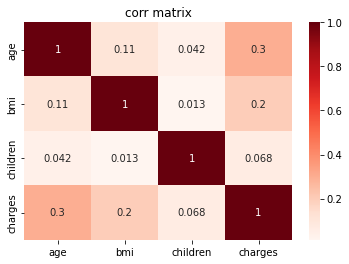

In [12]:
# correlation with numeric columns
med_df.corr()
sns.heatmap(med_df.corr(), cmap = 'Reds', annot = True)
plt.title('corr matrix')

Note: high corr cannot be used to interpret a cause-effect relationship between features (2 features X, Y can be correlated if X causes Y or vice versa, relation will no longer hold true of one of the cause-effect relationships is broken)
### Lin Regr using single feature (input)
- using value of (feature) 'age' for non-smokers to estimate the value of 'charges'

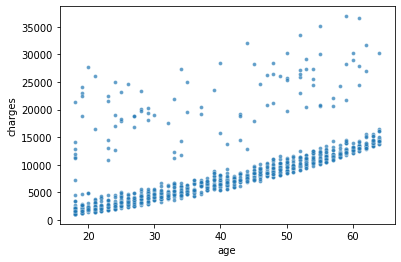

In [13]:
non_smok_df = med_df[med_df.smoker == 'no']
sns.scatterplot(data = non_smok_df, x='age', y='charges', alpha = 0.7, s =15)

we'll try to fit a line using points, & use line to predict charges for a given age.
- y = wx+b , where w - slope (weights of the model), b - intercept (bias) поднимает/опускат линию: parameters

age column (x) - inputs, charges column (y) - targets

determine w, b that best fits data

In [14]:
def est_charges(age, w, b):
    return w*age + b

In [15]:
w = 50
b = 100

In [16]:
ages = non_smok_df.age
estimated_charges = est_charges(ages, w, b)
#estimated_charges
#non_smok_df.charges

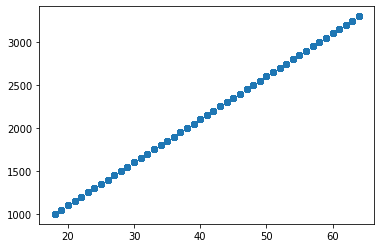

In [17]:
plt.scatter(ages, estimated_charges)
#plt.plot() to draw a line

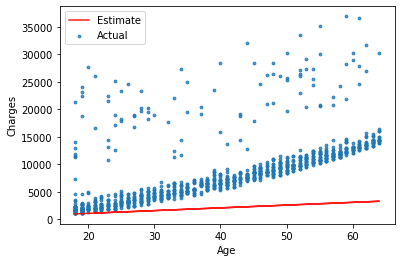

In [18]:
# overlay this line on the actual data
target = non_smok_df.charges
plt.plot(ages, estimated_charges, 'r', alpha = 0.9)

plt.scatter(ages, target, s=8, alpha = 0.8)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual'])

In [19]:
def try_parameters(w, b):
    ages = non_smok_df.age
    target = non_smok_df.charges
    
    estimated_charges = est_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha = 0.9)
    
    plt.scatter(ages, target, s=8, alpha = 0.8)
# as we move the line, we're learning the approx relation between age~charges

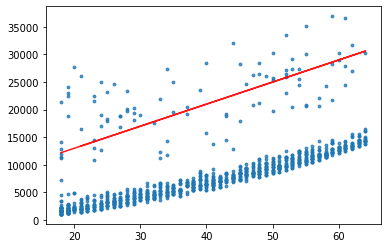

In [20]:
try_parameters(400, 5000)

In [22]:
predictions = estimated_charges
predictions

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

### Lost/Cost function
- comparing model's predictions with actual targets (y)

'residual' - difference between targets & predictions
#### RMSE (how far we are from the line)
- result is called the 'loss' as it indicates how bad the model is at predicting the target variables.

the lower the loss, the better the model

In [23]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

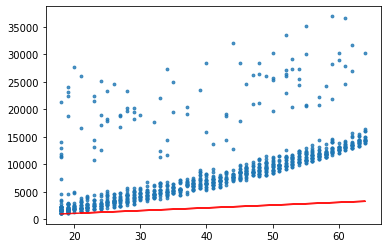

In [24]:
w = 50
b = 90
try_parameters(w, b)

In [25]:
targets = non_smok_df['charges']
predicted = est_charges(non_smok_df.age, w, b)

In [26]:
rmse(targets, predicted)
# on average, each element in prediction differs from the actual target by ...

8469.47403486089

In [27]:
def try_parameters(w, b):
    ages = non_smok_df.age
    target = non_smok_df.charges
    
    predictions = est_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha = 0.9)
    plt.scatter(ages, target, s=8, alpha = 0.8) 
    
loss = rmse(target, predictions)
print("RMSE Loss: ", loss )

RMSE Loss:  8461.949562575488


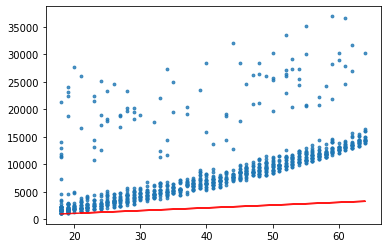

In [28]:
try_parameters(50, 90)

### Optimizer (improves model)
modify weights w & b to reduce loss & improve 'fit' of line to data
- OLS (better for smaller datasets ~ few 1k rows): computes best values for w & b using matrix operations
- Stochastic gradient descent (for larger datasets): uses iterative approach, starting with random values w & b, improving them using derivatives. 

Ex: on the hill, it's dark & want to figure out how to go down, u take steps in each direction, figure which direction goes down & then repeat.

In [29]:
from sklearn.linear_model import LinearRegression
# finding best fit line for "age" vs "charges" using OLS

In [30]:
model = LinearRegression()

In [ ]:
help(model.fit)
# Note: input x should be 2-dimen array, so pass dataframe instead of single column

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [31]:
inputs = non_smok_df[['age']]
targets = non_smok_df.charges

In [32]:
model.fit(inputs, targets)

LinearRegression()

##### now we can make predictions using model: predict charges for ages 23, 37, 61

In [33]:
model.predict(np.array([[23], [37], [61]]))
# compare with scatter plot above

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [34]:
# compute predictions for entire set
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [35]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [36]:
rmse(targets, predictions)

4662.505766636391

#### Parameters of model are stored in coef_ & intercept_  properties 

In [37]:
# w
model.coef_

array([267.24891283])

In [38]:
# b
model.intercept_

-2091.4205565650864

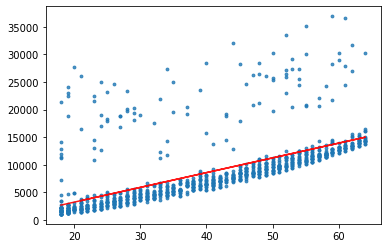

In [39]:
try_parameters(model.coef_, model.intercept_)
# it accounts the outliers

#### use lin_regr class -> fit the model -> generate predictions
try SGDRegressor class to train model
### ML - process of computing best parameters to model relationship between some feature & targets
3 components:
- model
- cost function (how badly the model is performing)
- optimizer (i.e. to change parameter of model so that it better fits the data)

In [40]:
# create inputs & targets
inputs, targets = non_smok_df[['age']], non_smok_df['charges']
# train model
model = LinearRegression().fit(inputs, targets)
# generate predictions
predictions = model.predict(inputs)
# compare predictions with the actual outputs (gives a measurement how bad your model is)
# comp loss to evaluate model
loss = rmse(targets, predictions)
print('Loss: ', loss)
# what information loss is?

Loss:  4662.505766636391


### Lin Regr using multiple feature
- using value (feature) of 'age' for non-smokers & feature 'bmi' to estimate the value of 'charges'

In [41]:
# create inputs & targets
inputs, targets = non_smok_df[['age', 'bmi']], non_smok_df['charges']
# train model
model = LinearRegression().fit(inputs, targets)
# generate predictions
predictions = model.predict(inputs)
# compare predictions with the actual outputs (gives a measurement how bad your model is)
# comp loss to evaluate model
loss = rmse(targets, predictions)
print('Loss: ', loss)
# what information loss is?

Loss:  4662.312835461298


So, adding 'bmi' does not seem to reduce loss by much because 'bmi' has weak correlation with charges (especially for non-smokers)

In [42]:
non_smok_df.charges.corr(non_smok_df.bmi)

0.08403654312833268

In [43]:
fig = px.scatter(non_smok_df, x='bmi', y = 'charges', title='BMI vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [44]:
# w, b
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488727)

In [45]:
# create inputs & targets
inputs, targets = med_df[['age', 'bmi']], med_df['charges']
# train model
model = LinearRegression().fit(inputs, targets)
# generate predictions
predictions = model.predict(inputs)
# compare predictions with the actual outputs (gives a measurement how bad your model is)
# comp loss to evaluate model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  11374.110466839


### 3 techniques to convert categorical columns to numerical:
- if categor column has 2 categories (binary category), then replace values with 1 & 0
- if categor column has >2 categories, perform one-hot encoding (create new column for each categor with 1's & 0's)
- if categories have natural order (cold, neutral, warm, hot), they can be converted to numbers (1, 2, 3) preserving the order (called ordinals)

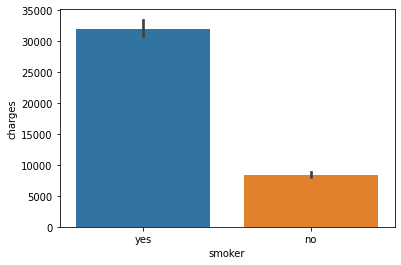

In [46]:
sns.barplot(data = med_df, x='smoker', y='charges')

In [47]:
smoker_codes = {'no': 0, 'yes': 1} # replays categor to numer
med_df['smoker_code'] = med_df.smoker.map(smoker_codes)

In [48]:
med_df.charges.corr(med_df.smoker_code)

0.787251430498478

In [49]:
med_df

age     sex     bmi  children smoker     region      charges  smoker_code
0      19  female  27.900         0    yes  southwest  16884.92400            1
1      18    male  33.770         1     no  southeast   1725.55230            0
2      28    male  33.000         3     no  southeast   4449.46200            0
3      33    male  22.705         0     no  northwest  21984.47061            0
4      32    male  28.880         0     no  northwest   3866.85520            0
...   ...     ...     ...       ...    ...        ...          ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830            0
1334   18  female  31.920         0     no  northeast   2205.98080            0
1335   18  female  36.850         0     no  southeast   1629.83350            0
1336   21  female  25.800         0     no  southwest   2007.94500            0
1337   61  female  29.070         0    yes  northwest  29141.36030            1

[1338 rows x 8 columns]

Now, we may use 'smoker_df' column for lin regr:

$ charges = w_{1} * age + w_{2} * bmi + w_{3} * charges + w_{4} * smoker + b$

In [50]:
# create inputs & targets
inputs, targets = med_df[['age', 'bmi', 'children', 'smoker_code']], med_df['charges']
# train model
model = LinearRegression().fit(inputs, targets)
# generate predictions
predictions = model.predict(inputs)
# compare predictions with the actual outputs (gives a measurement how bad your model is)
# comp loss to evaluate model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  6056.439217188077


#### Loss has reduced by almost 50%

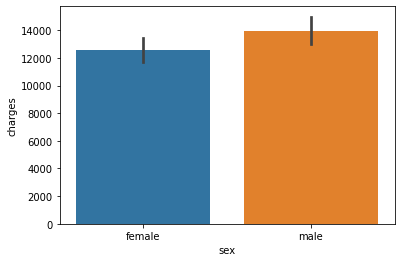

In [51]:
sns.barplot(data=med_df, x='sex', y='charges')

In [52]:
sex_codes = {'female': 0, 'male': 1}

In [53]:
med_df['sex_code'] = med_df.sex.map(sex_codes)

In [54]:
med_df.charges.corr(med_df.sex_code)

0.057292062202025484

### One-hot encoding
##### 'region' column contains 4 values
- use One-Hot Encoder & create a new column for each region

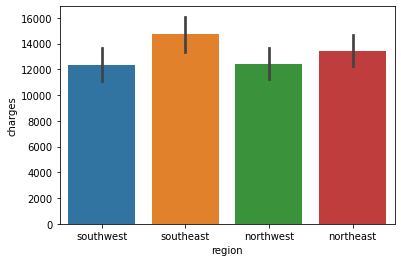

In [55]:
sns.barplot(data = med_df, x='region', y='charges')

In [56]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder() # class
enc.fit(med_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [57]:
enc.transform([['northeast']]).toarray()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



array([[1., 0., 0., 0.]])

In [58]:
enc.transform([['northwest']]).toarray()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



array([[0., 1., 0., 0.]])

In [59]:
enc.transform([['southeast']]).toarray()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



array([[0., 0., 1., 0.]])

In [60]:
enc.transform([['southwest']]).toarray()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



array([[0., 0., 0., 1.]])

In [61]:
one_hot = enc.transform(med_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [62]:
med_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

when u r working with 1 variable, you r trying to fit a line (start with a random line, move around), use loss function to find out how bad the line is, then use optimizer to slowly improve the line & move it around till it fits the data to the best extent possible which is to minimize the loss, then extend it mathematically into a bunch of other dimensions. 

### Feature Scaling
- to compare the importance of each feature in model, we shall compare their weights.

In [63]:
model.coef_

array([  257.84950728,   321.85140247,   473.50231561, 23811.3998446 ])

In [64]:
model.intercept_

-12102.7693627279

In [ ]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

In [ ]:
model.predict([28, 30, 2, 1, 0, 0, 1, 0, 0.]) # predicting medical charges
# each value has weight in our model

In [ ]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df
# bmi is limited from 15-40
# northeast only takes values of 1 & 0

As diff columns have diff ranges, 2 issues:
- we can't compare weights of diff column to identify which features are important
- column with larger range of inputs may disproportionately affect the loss & dominate optimization process

So, it's common to scale (standardize) values in numeric column by substracting mean & diving by st deviation


In [69]:
from sklearn.preprocessing import StandardScaler
numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(med_df[numeric_cols])

StandardScaler()

In [70]:
scaler.mean_
# computes for each of numeric cols

array([39.20702541, 30.66339686,  1.09491779])

In [71]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [72]:
# scale data as follows 
scaled_inputs = scaler.transform(med_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

They can now be combined with categorical data:

In [73]:
cat_cols = ['smoker_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = med_df[cat_cols].values

In [75]:
# create inputs & targets
inputs = np.concatenate((scaled_inputs, categorical_data), axis = 1)
targets = med_df.charges
# train model
model = LinearRegression().fit(inputs, targets)
# generate predictions
predictions = model.predict(inputs)
# compare predictions with the actual outputs (gives a measurement how bad your model is)
# comp loss to evaluate model
loss = rmse(targets, predictions)
print('Loss: ', loss)
# scaling does not make diff for the loss, but how it does for weights

Loss:  6042.033215394106


In [76]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending = False)
# now u can see the most important features: smoker, age, bmi
# 1 - represents the intercept (bias)

feature        weight
3  smoker_code  23836.300502
8            1   8402.640125
0          age   3609.119197
1          bmi   2064.468352
4    northeast    586.479228
2     children    571.872609
5    northwest    234.297116
7    southwest   -372.895445
6    southeast   -447.880899

In [77]:
new_customer = [[28, 30, 2, 1, 0, 0, 1, 0, 0.]] 

In [78]:
scaler.transform([[28, 30, 2]]) # interested in the 1st 3s

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-0.79795355, -0.10882659,  0.75107928]])

In [ ]:
model.predict([[]]) # here input values from scaler to predict the charges of the customer

## Approach ML model
### strategy:
- Explore data & find correlation between inputs & targets
- Pick right model (Lin Regr), loss functions (RMSE) & optimizer (least squares) for the problem at hand
- Scale numeric variables (mean = 0, std = 1) & one-hot encode categorical data
- Set aside a test set (using fraction of the training set)
- Train the model
- Make predictions on the test set & compute loss

### Creating a Test Set
set aside 10% of data just for testing & reporting on results

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size = 0.1)
# 10% for testing
# 90% for training

In [ ]:
model = LinearRegression().fit(inputs_train, targets_train)
# generate predictions
predictions_test = model.predict(inputs_test)
# comp loss to evaluate model
loss = rmse(targets_test, predictions_test)
print('Test Loss: ', loss)
# overfitting

Test Loss:  6546.851620789481


In [ ]:
predictions_train = model.predict(inputs_train)
# compare predictions with the actual outputs (gives a measurement how bad your model is)
# comp loss to evaluate model
loss = rmse(targets_train, predictions_train)
print('Training Loss: ', loss)

Training Loss:  5999.692698290599


Always: Loss on test set is > than on the training

### Regression problem

- problems where a continuous numeric value (predict exact number) must be predicted for each input 

Lin Regr: target is modeled as lin combination (weighted sum) of input features, predictions are evaluated using loss function RMSE

### Classification problem

- problems where each input must be assigned a discrete category (label or class)
- may  binary (yes/no) or multiclass (picking one of many classes)

### Logistic regression (for classification)

In [11]:
w_df = pd.read_csv('https://raw.githubusercontent.com/ewelborn/Australian-Weather-Prediction-Model/main/MachineLearningProject/weatherAUS.csv')
w_df

Date Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
0       2008-12-01   Albury     13.4  ...     21.8         No            No
1       2008-12-02   Albury      7.4  ...     24.3         No            No
2       2008-12-03   Albury     12.9  ...     23.2         No            No
3       2008-12-04   Albury      9.2  ...     26.5         No            No
4       2008-12-05   Albury     17.5  ...     29.7         No            No
...            ...      ...      ...  ...      ...        ...           ...
145455  2017-06-21    Uluru      2.8  ...     22.4         No            No
145456  2017-06-22    Uluru      3.6  ...     24.5         No            No
145457  2017-06-23    Uluru      5.4  ...     26.1         No            No
145458  2017-06-24    Uluru      7.8  ...     26.0         No            No
145459  2017-06-25    Uluru     14.9  ...     20.9         No           NaN

[145460 rows x 23 columns]

#### create a model to predict to predict value in column RainTomorrow

In [ ]:
w_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

#### discard rows where values are missing

In [ ]:
w_df.dropna(subset = ['RainToday', 'RainTomorrow'], inplace = True)

In [ ]:
w_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null

#### important to explore the distributions of columns & see the relation to the target column

In [ ]:
px.histogram(w_df, x = 'Location', title = 'Location vs. Rainy Days', color = 'RainToday')

In [ ]:
w_df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           503
Rainfall          679
Evaporation       355
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       545
Pressure3pm       548
Cloud9am           10
Cloud3pm           10
Temp9am           440
Temp3pm           500
RainToday           2
RainTomorrow        2
dtype: int64

In [ ]:
w_df.Location.nunique()

49

In [ ]:
px.histogram(w_df, x = 'RainTomorrow', title = 'RainTomorrow vs. Rain Today', color = 'RainToday')

In [ ]:
px.histogram(w_df, x = 'Temp3pm', title = 'Temperature at 3pm vs. RainTomorrow', color = 'RainTomorrow')

In [ ]:
px.histogram(w_df, x = 'RainTomorrow', title = 'RainTomorrow vs. Rain Today', color = 'RainToday')

#### Class imbalance, not an equal number of observations in each class

In [ ]:
px.scatter(w_df.sample(2000), title = 'Min Temp. vs Max Temp.', x = 'MinTemp', y = 'MaxTemp', color = 'RainToday')

#### Good idea to work with a sample initially, to quickly set up model training notebook

In [ ]:
use_sample = True

In [ ]:
sample_fraction = 0.1

In [ ]:
if use_sample:
    w_df = w_df.sample(frac = sample_fraction).copy()

### Training, Validation & Test Sets

1. Training - used to train model, compute loss & adjust model's weights using optimization technique.
2. Validation set - used to evaluate model during training, tune model hyperparameters (opt, regularization, etc) & pick the best version of the model. Picking a good validation set is essential for training models that generalize well.
3. Test set - used to compare diff models/approaches & report the model's final accuracy. It reflects the kind of data the model will encounter in the real-world, as closely as feasible.

Think of a school. You learn by reading textbooks: figure out & understand techniques or just remember the answers to some questions - you simply TRAIN. Exams/midterms when they check your knowledge (model), face questions that you have not already solved - VALIDATION set (use to improve yourself & change approach while building a model). Obviously, your performance (of model) is a little bit worse, you need to learn the actual concepts or the underlying relationships rather than simply memorizing the answers. Then, you have board exams (SATs, i.e. finals at the very end of school year), used to compare the performances of students across the nation/world, everybody is ranked based on that exam - called a TEST set (report final performance).

##### Rule of thumb:
- use 60% of data for training set
- 20% for validation set
- 20% for test set

If separate test set is provided, use 75%-25% training validation split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_val_df, test_df = train_test_split(w_df, test_size = 0.2, random_state = 42)
train_df, val_df = train_test_split(train_val_df, test_size = 0.25, random_state = 42)
# random fraction is fixed across our runs, otherwise we will not be able to compare with each run of our notebook

In [ ]:
print('train_df.shape :' , train_df.shape)
print('val_df.shape :' , val_df.shape)
print('test_df.shape :' , test_df.shape)

train_df.shape : (8447, 23)
val_df.shape : (2816, 23)
test_df.shape : (2816, 23)


When working with dates, better to separate training, validation & test sets with time, i.e. model is trained on data from past & evaluated on data from future.

In [ ]:
w_df

Date          Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
32326   2014-03-20            Sydney     21.7  ...     26.4         No            No
64585   2010-01-30  MelbourneAirport     10.3  ...     34.8         No            No
103327  2011-02-14         Nuriootpa     12.5  ...     25.8         No            No
97871   2012-10-29          Adelaide     10.7  ...     29.2         No            No
81474   2010-04-22          Dartmoor     10.6  ...     27.5         No           Yes
...            ...               ...      ...  ...      ...        ...           ...
137354  2012-07-06      AliceSprings     -4.4  ...     15.5         No            No
137692  2013-08-07      AliceSprings      4.9  ...     25.0         No            No
119333  2013-11-29      PerthAirport     16.7  ...     18.8         No           Yes
47952   2014-07-21          Canberra     -3.8  ...     12.8         No            No
130105  2009-03-25            Hobart     14.2  ...     20.2         No            No

[14079 rows x 23 columns]

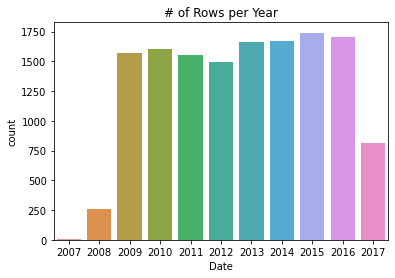

In [ ]:
plt.title('# of Rows per Year')
sns.countplot(x = pd.to_datetime(w_df.Date).dt.year);

In [ ]:
year = pd.to_datetime(w_df.Date).dt.year

train_df = w_df[year < 2015]
val_df = w_df[year == 2015]
test_df = w_df[year > 2015]
# train the model using data till 2014
# use data from 2015 as validation set
# then, use 2016, 2017 as test set

In [ ]:
print('train_df.shape :' , train_df.shape)
print('val_df.shape :' , val_df.shape)
print('test_df.shape :' , test_df.shape)

train_df.shape : (9821, 23)
val_df.shape : (1741, 23)
test_df.shape : (2517, 23)


- test val & test set both contain data for all 12 months of the year

In [ ]:
train_df

Date          Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
32326   2014-03-20            Sydney     21.7  ...     26.4         No            No
64585   2010-01-30  MelbourneAirport     10.3  ...     34.8         No            No
103327  2011-02-14         Nuriootpa     12.5  ...     25.8         No            No
97871   2012-10-29          Adelaide     10.7  ...     29.2         No            No
81474   2010-04-22          Dartmoor     10.6  ...     27.5         No           Yes
...            ...               ...      ...  ...      ...        ...           ...
137354  2012-07-06      AliceSprings     -4.4  ...     15.5         No            No
137692  2013-08-07      AliceSprings      4.9  ...     25.0         No            No
119333  2013-11-29      PerthAirport     16.7  ...     18.8         No           Yes
47952   2014-07-21          Canberra     -3.8  ...     12.8         No            No
130105  2009-03-25            Hobart     14.2  ...     20.2         No            No

[9821 rows x 23 columns]

In [ ]:
val_df

Date       Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
29352   2015-03-25       Richmond     11.9  ...     24.2        Yes            No
51160   2015-01-06    Tuggeranong     18.1  ...     25.2        Yes            No
35806   2015-07-04  SydneyAirport      5.0  ...     14.0         No            No
83295   2015-07-15       Dartmoor      1.5  ...      8.7        Yes           Yes
35678   2015-02-26  SydneyAirport     19.5  ...     26.0        Yes            No
...            ...            ...      ...  ...      ...        ...           ...
2240    2015-04-18         Albury     15.2  ...     17.2        Yes           Yes
57301   2015-03-08       Ballarat     11.8  ...     22.7         No            No
141583  2015-07-06         Darwin     19.6  ...     31.7         No            No
17453   2015-09-02      Newcastle      6.0  ...      NaN         No           Yes
26282   2015-01-23        Penrith     21.3  ...     33.9         No           Yes

[1741 rows x 23 columns]

In [ ]:
test_df

Date       Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
90072   2017-01-09         Cairns     25.5  ...     31.2         No           Yes
117483  2017-01-31     PearceRAAF     16.2  ...     19.4        Yes           Yes
77810   2016-12-29       Portland     15.7  ...     26.5        Yes            No
95874   2016-04-06     Townsville     20.7  ...     30.6         No            No
29869   2016-08-23       Richmond      4.2  ...     17.0        Yes            No
...            ...            ...      ...  ...      ...        ...           ...
23884   2016-10-25  NorfolkIsland     15.3  ...     20.6        Yes            No
114229  2016-05-31    Witchcliffe      6.9  ...     17.7         No            No
8533    2016-01-18          Cobar     19.3  ...     32.2         No            No
83973   2017-05-23       Dartmoor     10.8  ...     15.0        Yes           Yes
42435   2017-03-06    Williamtown     19.5  ...     24.4         No           Yes

[2517 rows x 23 columns]

In [ ]:
# creating list of input columns, identify target column
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'
# logistic regr expects to have single target column

In [ ]:
print(input_cols)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


In [ ]:
target_col

'RainTomorrow'

Now,let's create inputs & targets for training, val & test sets for further processing & model training

In [ ]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [ ]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [ ]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [ ]:
train_inputs

Location  MinTemp  MaxTemp  ...  Temp9am  Temp3pm  RainToday
32326             Sydney     21.7     27.0  ...     25.5     26.4         No
64585   MelbourneAirport     10.3     36.1  ...     16.8     34.8         No
103327         Nuriootpa     12.5     27.1  ...     16.2     25.8         No
97871           Adelaide     10.7     30.6  ...     20.2     29.2         No
81474           Dartmoor     10.6     27.8  ...     16.5     27.5         No
...                  ...      ...      ...  ...      ...      ...        ...
137354      AliceSprings     -4.4     16.4  ...      5.1     15.5         No
137692      AliceSprings      4.9     26.0  ...     16.0     25.0         No
119333      PerthAirport     16.7     25.1  ...     22.5     18.8         No
47952           Canberra     -3.8     13.1  ...      0.1     12.8         No
130105            Hobart     14.2     21.1  ...     16.0     20.2         No

[9821 rows x 21 columns]

In [ ]:
train_targets

32326      No
64585      No
103327     No
97871      No
81474     Yes
         ... 
137354     No
137692     No
119333    Yes
47952      No
130105     No
Name: RainTomorrow, Length: 9821, dtype: object

In [ ]:
numeric_cols = train_inputs.select_dtypes(include = np.number).columns.tolist()[:-1]
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [ ]:
train_inputs[numeric_cols].describe()

MinTemp      MaxTemp  ...     Cloud3pm      Temp9am
count  9788.000000  9795.000000  ...  6200.000000  9751.000000
mean     11.994279    22.989617  ...     4.417097    16.813517
std       6.378711     6.951646  ...     2.697151     6.428331
min      -6.400000    -4.100000  ...     0.000000    -3.800000
25%       7.500000    17.900000  ...     2.000000    12.200000
50%      11.700000    22.300000  ...     5.000000    16.500000
75%      16.500000    27.900000  ...     7.000000    21.300000
max      30.700000    47.300000  ...     8.000000    38.300000

[8 rows x 15 columns]

In [ ]:
# checking number of categories in each categorical columns
train_inputs[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

### Imputing Missing Numeric Data
let's replace missing values with the average value in the column

In [ ]:
 from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy = 'mean')
# or 'median' if there are outliers that may affect the average

In [ ]:
# check the number of missing values in each numeric column
w_df[numeric_cols].isna().sum()

MinTemp            47
MaxTemp            36
Rainfall            0
Evaporation      5935
Sunshine         6662
WindGustSpeed     944
WindSpeed9am      108
WindSpeed3pm      274
Humidity9am       163
Humidity3pm       374
Pressure9am      1370
Pressure3pm      1378
Cloud9am         5284
Cloud3pm         5664
Temp9am            78
dtype: int64

At first, fit the imputer to the data, i.e. compute chosen statistic (mean) for each column in dataset.

In [ ]:
imputer.fit(w_df[numeric_cols])

SimpleImputer()

In [ ]:
list(imputer.statistics_)

[12.17214937286203,
 23.233433027130953,
 2.350010654165779,
 5.3971881139489195,
 7.62638533099636,
 39.69356680624286,
 13.944098489728724,
 18.542122419413257,
 68.87561080770337,
 51.3948923750456,
 1017.689165158549,
 1015.2906192425794,
 4.425923820352473,
 4.510160427807486,
 16.98090136418827]

In [ ]:
imputer.transform(train_inputs[numeric_cols])

array([[21.7       , 27.        ,  0.        , ...,  3.        ,
         3.        , 25.5       ],
       [10.3       , 36.1       ,  0.        , ...,  0.        ,
         1.        , 16.8       ],
       [12.5       , 27.1       ,  0.        , ...,  6.        ,
         7.        , 16.2       ],
       ...,
       [16.7       , 25.1       ,  0.        , ...,  5.        ,
         6.        , 22.5       ],
       [-3.8       , 13.1       ,  0.        , ...,  4.42592382,
         4.51016043,  0.1       ],
       [14.2       , 21.1       ,  0.        , ...,  8.        ,
         7.        , 16.        ]])

In [ ]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [ ]:
train_inputs[numeric_cols]

MinTemp  MaxTemp  Rainfall  ...  Cloud9am  Cloud3pm  Temp9am
32326      21.7     27.0       0.0  ...  3.000000   3.00000     25.5
64585      10.3     36.1       0.0  ...  0.000000   1.00000     16.8
103327     12.5     27.1       0.0  ...  6.000000   7.00000     16.2
97871      10.7     30.6       0.0  ...  4.425924   4.51016     20.2
81474      10.6     27.8       0.0  ...  4.425924   4.51016     16.5
...         ...      ...       ...  ...       ...       ...      ...
137354     -4.4     16.4       0.0  ...  1.000000   0.00000      5.1
137692      4.9     26.0       0.0  ...  0.000000   0.00000     16.0
119333     16.7     25.1       0.0  ...  5.000000   6.00000     22.5
47952      -3.8     13.1       0.0  ...  4.425924   4.51016      0.1
130105     14.2     21.1       0.0  ...  8.000000   7.00000     16.0

[9821 rows x 15 columns]

In [ ]:
# missing values are filled in with mean of each column
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
dtype: int64

### Scaling Numeric Features

to small range of values (0, 1) or (-1, 1)
- ensures that no particular feature has a disproportionate impact on model's loss (optimization algo's works better with smaller numbers too), i.e. higher the loss - worse the model

basically, values with high magnitude (range) tend to dominate the loss, so features with lower abs values & range of values tend to not show up in the loss as much 

In [ ]:
w_df[numeric_cols].describe()

MinTemp       MaxTemp  ...     Cloud3pm       Temp9am
count  14032.000000  14043.000000  ...  8415.000000  14001.000000
mean      12.172149     23.233433  ...     4.510160     16.980901
std        6.435172      7.096213  ...     2.709729      6.520160
min       -6.900000     -4.100000  ...     0.000000     -4.500000
25%        7.600000     18.000000  ...     2.000000     12.300000
50%       11.900000     22.600000  ...     5.000000     16.600000
75%       16.800000     28.200000  ...     7.000000     21.500000
max       30.700000     47.300000  ...     8.000000     38.300000

[8 rows x 15 columns]

Use MinMaxScaler to scale values to (0, 1) range

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(w_df[numeric_cols])
# compute the range of values for each numeric column

MinMaxScaler()

In [ ]:
print('Minimum: ')
list(scaler.data_min_)

Minimum: 


[-6.9,
 -4.1,
 0.0,
 0.0,
 0.0,
 9.0,
 0.0,
 0.0,
 1.0,
 2.0,
 986.3,
 984.2,
 0.0,
 0.0,
 -4.5]

In [ ]:
print('Maximum: ')
list(scaler.data_max_)

Maximum: 


[30.7,
 47.3,
 240.0,
 72.2,
 14.1,
 130.0,
 74.0,
 65.0,
 100.0,
 100.0,
 1040.3,
 1037.2,
 8.0,
 8.0,
 38.3]

In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [ ]:
train_inputs[numeric_cols].describe()

MinTemp      MaxTemp  ...     Cloud3pm      Temp9am
count  9821.000000  9821.000000  ...  9821.000000  9821.000000
mean      0.502523     0.527048  ...     0.556426     0.498007
std       0.169362     0.135067  ...     0.267926     0.149659
min       0.013298     0.000000  ...     0.000000     0.016355
25%       0.382979     0.428016  ...     0.375000     0.390187
50%       0.497340     0.513619  ...     0.563770     0.490654
75%       0.622340     0.620623  ...     0.750000     0.602804
max       1.000000     1.000000  ...     1.000000     1.000000

[8 rows x 15 columns]

### Encoding Categorical Data
- one-hot encoding involves adding a new binary (0/1) column for each unique category of categor column

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

In [ ]:
w_df2 = w_df[categorical_cols].fillna('Unknown')

In [ ]:
# identify full list of categories across all categorical columns
encoder.fit(w_df2)

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'Unknown', 'W', 'WNW', 'WSW'], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'Unknown', 'W', 'WNW', 'WSW'], dtype=

##### generate column names for each individ category

In [ ]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [ ]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols].fillna('Unknown'))
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols].fillna('Unknown'))
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols].fillna('Unknown'))

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
test_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
90072          Cairns  0.861702  0.696498  0.000000     0.074753  0.540878   
117483     PearceRAAF  0.614362  0.521401  0.112500     0.074753  0.000000   
77810        Portland  0.601064  0.603113  0.037500     0.074753  0.540878   
95874      Townsville  0.734043  0.706226  0.000000     0.121884  0.787234   
29869        Richmond  0.295213  0.420233  0.012500     0.013850  0.540878   
...               ...       ...       ...       ...          ...       ...   
23884   NorfolkIsland  0.590426  0.494163  0.055833     0.080332  0.540878   
114229    Witchcliffe  0.367021  0.437743  0.000000     0.074753  0.540878   
8533            Cobar  0.696809  0.750973  0.000000     0.124654  0.540878   
83973        Dartmoor  0.470745  0.420233  0.009167     0.074753  0.540878   
42435     Williamtown  0.702128  0.577821  0.001667     0.074753  0.540878   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
90072          SSE       0.198347        SSE         NE      0.148649   
117483           E       0.173554        SSE        SSE      0.148649   
77810            W       0.289256         NW          W      0.094595   
95874          ENE       0.214876        SSE        ENE      0.229730   
29869           SW       0.140496        NNW          S      0.027027   
...            ...            ...        ...        ...           ...   
23884          SSW       0.231405         SW        WSW      0.324324   
114229          SW       0.066116        NaN        WSW      0.000000   
8533             E       0.198347        ENE          S      0.256757   
83973          WNW       0.322314        NNW        NNW      0.148649   
42435            S       0.504132         SW        SSW      0.324324   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
90072       0.292308     0.868687     0.714286     0.396296     0.381132   
117483      0.230769     0.888889     0.897959     0.512963     0.522642   
77810       0.261538     0.898990     0.346939     0.320370     0.332075   
95874       0.400000     0.565657     0.530612     0.559259     0.537736   
29869       0.138462     0.989899     0.510204     0.525926     0.549057   
...              ...          ...          ...          ...          ...   
23884       0.307692     0.525253     0.520408     0.564815     0.594340   
114229      0.138462     0.868687     0.632653     0.644444     0.675472   
8533        0.138462     0.373737     0.173469     0.564815     0.562264   
83973       0.092308     0.979798     0.816327     0.553704     0.532075   
42435       0.707692     0.666667     0.581633     0.470370     0.518868   

        Cloud9am  Cloud3pm   Temp9am  Temp3pm RainToday  Location_Adelaide  \
90072    1.00000   0.56377  0.726636     31.2        No                0.0   
117483   1.00000   1.00000  0.525701     19.4       Yes                0.0   
77810    1.00000   0.56377  0.507009     26.5       Yes                0.0   
95874    0.25000   0.75000  0.759346     30.6        No                0.0   
29869    0.25000   0.87500  0.327103     17.0       Yes                0.0   
...          ...       ...       ...      ...       ...                ...   
23884    0.12500   0.12500  0.560748     20.6       Yes                0.0   
114229   0.55324   0.56377  0.380841     17.7        No                0.0   
8533     0.87500   0.62500  0.677570     32.2        No                0.0   
83973    0.55324   0.56377  0.378505     15.0       Yes                0.0   
42435    0.87500   0.12500  0.602804     24.4        No                0.0   

        Location_Albany  Location_Albury  Location_AliceSprings  \
90072               0.0              0.0                    0.0   
117483              0.0              0.0                    0.0   
77810               0.0              0.0                    0.0   
95874               0.0              0.0                    0.0   
29869         

### Training **Logistic Regression**
solves binary classification problems

- take linear combination (or weighted sum of input features)
- apply **sigmoid function** to result to obtain a number between 0 & 1
- it represents the probability of input being classified as "Yes"
- instead of RMSE, **cross entropy loss function** (penalizes bad predictions) used to evaluate the results

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(solver = 'liblinear')

In [ ]:
%%time
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

CPU times: user 90.8 ms, sys: 3.05 ms, total: 93.8 ms
Wall time: 104 ms


LogisticRegression(solver='liblinear')

1. Initialize a model with random parameters (weights & biases)
2. Pass some inputs into the model to obtain predictions
3. Compare model's predictions with the actual targets using loss function
4. Use an optimization technique (least squares, gradient descent..) to reduce the loss by adjusting the weights & biases of the model
5. Repeat steps till the predictions from model are good enough.

Now, let's check the weights & biases of trained model

In [ ]:
print(numeric_cols + encoded_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums'

In [ ]:
n = len(model.coef_.tolist())

weight_df = pd.DataFrame({
    'feature': (numeric_cols + encoded_cols),
    'weight': model.coef_.tolist()[0]
})

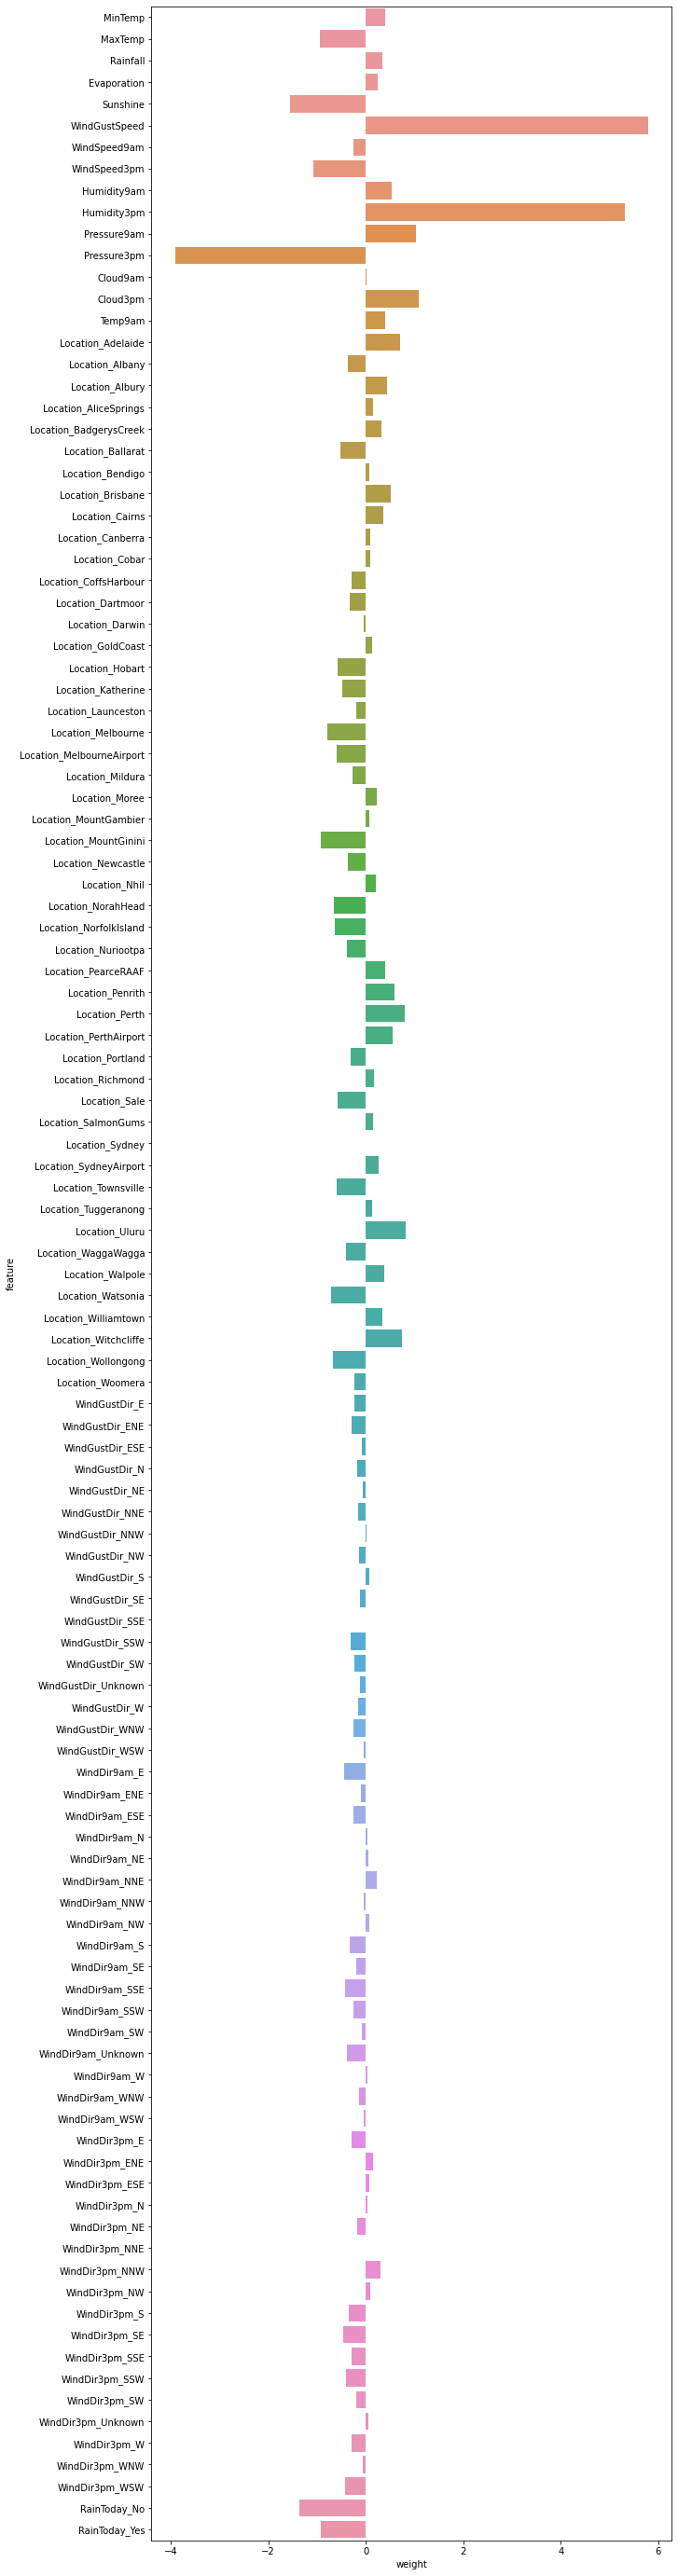

In [ ]:
plt.figure(figsize = (10, 50))
sns.barplot(data = weight_df, x = 'weight', y = 'feature')

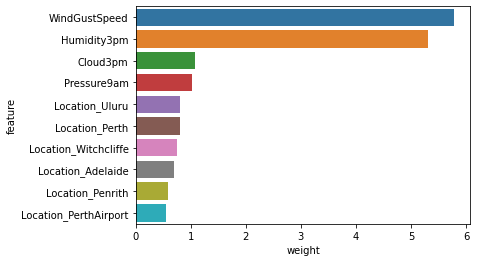

In [ ]:
sns.barplot(data = weight_df.sort_values('weight', ascending = False).head(10), x = 'weight', y = 'feature')

In [ ]:
print(model.coef_.tolist())

[[0.38987142621526666, -0.9470891545194874, 0.34783548425731914, 0.237306573049046, -1.5494493749546618, 5.789988741459995, -0.2613608446519839, -1.069419309024757, 0.5326004199052349, 5.317348333140075, 1.0212023275448285, -3.9169238881846824, 0.010195433741168115, 1.0874395789198343, 0.40479362086618564, 0.7041890094603337, -0.36783968396715855, 0.4376093165766255, 0.14173777548087796, 0.3166669098947848, -0.5303398600229878, 0.0683277590458127, 0.5172211879324153, 0.36750420475351286, 0.08710011614233908, 0.08229082625630015, -0.28463235710569257, -0.33228695767724176, -0.041151762987069025, 0.13804590829809288, -0.5860347181250115, -0.48470415052558397, -0.19722786067227466, -0.78546276869202, -0.5899378142780543, -0.2748333578235525, 0.21752308931363237, 0.07616378876334488, -0.9268507525518689, -0.37153838748744056, 0.21104936623199677, -0.6545370608857036, -0.6443863071518505, -0.3841483332542738, 0.3917553457412008, 0.5800415045647119, 0.802492406978612, 0.5451150566183368, -0.

In [ ]:
print(model.intercept_)

[-2.28735881]


Each weight is applied to value in specific column of the input. 

Higher the weight, greater the impact of the column on prediction.

### Making Predictions & Evaluating Model

In [ ]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [ ]:
train_preds = model.predict(X_train)

In [ ]:
train_preds
# predictions that our model has created

array(['No', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [ ]:
train_targets
# what we expect to see from our model, actual targets

32326      No
64585      No
103327     No
97871      No
81474     Yes
         ... 
137354     No
137692     No
119333    Yes
47952      No
130105     No
Name: RainTomorrow, Length: 9821, dtype: object

In [ ]:
# output a probabilistic prediction
train_probs = model.predict_proba(X_train)
train_probs
# probabilities for target classes "No" & "Yes"

array([[0.96826314, 0.03173686],
       [0.99032512, 0.00967488],
       [0.98613852, 0.01386148],
       ...,
       [0.1260509 , 0.8739491 ],
       [0.95921951, 0.04078049],
       [0.83994923, 0.16005077]])

In [ ]:
model.classes_

array(['No', 'Yes'], dtype=object)

Test the accuracy of model's predictions by computing the % of matching values (in train_preds & train_targets) 

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(train_targets, train_preds)

0.8520517258934935

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(train_targets, train_preds, normalize = 'true')

array([[0.94935712, 0.05064288],
       [0.48522055, 0.51477945]])

In [ ]:
def predict_and_plot(inputs, targets, name = ''):
  preds = model.predict(inputs)

  accuracy = accuracy_score(targets, preds)
  print("Accuracy: {:.2f}%". format(accuracy*100))

  cf = confusion_matrix(targets, preds, normalize = 'true')
  plt.figure()
  sns.heatmap(cf, annot = True)
  plt.xlabel('Prediction')
  plt.ylabel('Target')
  plt.title('{} Confusion Matrix'.format(name));

  return preds


Accuracy: 85.21%


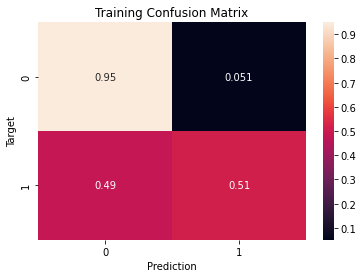

In [ ]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Compute model's accuracy on validation & test sets

Accuracy: 85.53%


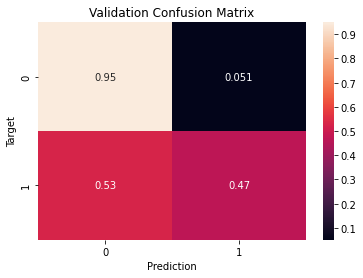

In [ ]:
val_preds = predict_and_plot(X_val, val_targets, 'Validation')

Accuracy: 85.42%


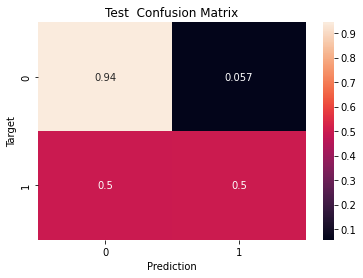

In [ ]:
test_preds = predict_and_plot(X_test, test_targets, 'Test ')

So, model's accuracy on val & test sets is above 84%, meaning that *our model generalizes well to data it hasn't seen before*.

A good way to verify whether a model has actually learned something useful is to **compare its results to a 'random' or 'dumb' model**.

Let's create 2 models: 1 that guesses randomly & another that always return "No". Both models ignore inputs given to them. 

In [ ]:
def random_guess(inputs):
  return np.random.choice(["No", "Yes"], len(inputs))

In [ ]:
def all_no(inputs):
  return np.full(len(inputs), "No")

In [ ]:
# baseline models
random_guess(X_val)

array(['No', 'No', 'No', ..., 'Yes', 'Yes', 'No'], dtype='<U3')

In [ ]:
all_no(X_val)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype='<U2')

In [ ]:
# checking accuracies on test set
accuracy_score(test_targets, random_guess(X_test))

0.5017878426698451

In [ ]:
accuracy_score(test_targets, all_no(X_test))

0.798569725864124

 Initializing LogisticRegression model with different hyperparameters (to differentiate them from weights & biases - parameters learned by model during training) 



### Making Predictions on Single Input

once model is trained to satisfactory accuracy, it can be used to make predictions on new data.

In [ ]:
new_input = {'Date': '2021-06-19',
             'Location': 'Katherine',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}
# NEED TO PREDICT 'RainTomorrow'

In [ ]:
# let's convert dict to pd.DataFrame (single row, same kind of structure when we trained a model)
new_input_df = pd.DataFrame([new_input])

In [ ]:
new_input_df

Date   Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2021-06-19  Katherine     23.2     33.2      10.2          4.2       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0         NNW           52.0         NW        NNE          13.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          20.0         89.0         58.0       1004.8       1001.5       8.0   

   Cloud3pm  Temp9am  Temp3pm RainToday  
0       5.0     25.7     33.0       Yes

Apply preprocessing steps as we trained the model:

- Imputation of missing values using 'imputer'
- Scaling numerical features using 'scaler'
- Encoding categorical features using 'encoder'

In [ ]:
new_input_df[numeric_cols] = imputer.transform(new_input_df[numeric_cols])
new_input_df[numeric_cols] = scaler.transform(new_input_df[numeric_cols])
new_input_df[encoded_cols] = encoder.transform(new_input_df[categorical_cols])

In [ ]:
new_input_df

Date   Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2021-06-19  Katherine  0.800532  0.725681    0.0425     0.058172  0.540878   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0         NNW       0.355372         NW        NNE      0.175676   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0      0.307692     0.888889     0.571429     0.342593     0.326415       1.0   

   Cloud3pm   Temp9am  Temp3pm RainToday  Location_Adelaide  Location_Albany  \
0     0.625  0.705607     33.0       Yes                0.0              0.0   

   Location_Albury  Location_AliceSprings  Location_BadgerysCreek  \
0              0.0                    0.0                     0.0   

   Location_Ballarat  Location_Bendigo  Location_Brisbane  Location_Cairns  \
0                0.0               0.0                0.0              0.0   

   Location_Canberra  Location_Cobar  Location_CoffsHarbour  \
0                0.0             0.0                    0.0   

   Location_Dartmoor  Location_Darwin  Location_GoldCoast  Location_Hobart  \
0                0.0              0.0                 0.0              0.0   

   Location_Katherine  Location_Launceston  Location_Melbourne  \
0                 1.0                  0.0                 0.0   

   Location_MelbourneAirport  Location_Mildura  Location_Moree  \
0                        0.0               0.0             0.0   

   Location_MountGambier  Location_MountGinini  Location_Newcastle  \
0                    0.0                   0.0                 0.0   

   Location_Nhil  Location_NorahHead  Location_NorfolkIsland  \
0            0.0                 0.0                     0.0   

   Location_Nuriootpa  Location_PearceRAAF  Location_Penrith  Location_Perth  \
0                 0.0                  0.0               0.0             0.0   

   Location_PerthAirport  Location_Portland  Location_Richmond  Location_Sale  \
0                    0.0                0.0                0.0            0.0   

   Location_SalmonGums  Location_Sydney  Location_SydneyAirport  \
0                  0.0              0.0                     0.0   

   Location_Townsville  Location_Tuggeranong  Location_Uluru  \
0                  0.0                   0.0             0.0   

   Location_WaggaWagga  Location_Walpole  Location_Watsonia  \
0                  0.0               0.0                0.0   

   Location_Williamtown  Location_Witchcliffe  Location_Wollongong  \
0                   0.0                   0.0                  0.0   

   Location_Woomera  WindGustDir_E  WindGustDir_ENE  WindGustDir_ESE  \
0               0.0            0.0              0.0              0.0   

   WindGustDir_N  WindGustDir_NE  WindGustDir_NNE  WindGustDir_NNW  \
0            0.0             0.0              0.0              1.0   

   WindGustDir_NW  WindGustDir_S  WindGustDir_SE  WindGustDir_SSE  \
0             0.0            0.0             0.0              0.0   

   WindGustDir_SSW  WindGustDir_SW  WindGustDir_Unknown  WindGustDir_W  \
0              0.0             0.0                  0.0            0.0   

   WindGustDir_WNW  WindGustDir_WSW  WindDir9am_E  WindDir9am_ENE  \
0              0.0              0.0           0.0             0.0   

   WindDir9am_ESE  WindDir9am_N  WindDir9am_NE  WindDir9am_NNE  \
0             0.0           0.0            0.0             0.0   

   WindDir9am_NNW  WindDir9am_NW  WindDir9am_S  WindDir9am_SE  WindDir9am_SSE  \
0             0.0            1.0           0.0            0.0             0.0   

   WindDir9am_SSW  WindDir9am_SW  WindDir9am_Unknown  WindDir9am_W  \
0             0.0            0.0                 0.0           0.0   

   WindDir9am_WNW  WindDir9am_WSW  WindDir3pm_E  WindDir3pm_ENE  \
0             0.0             0.0           0.0             0.0   

   WindDir3pm_ESE  WindDir3pm_N  WindDir3pm_NE  WindDir3pm_NNE  \
0             0.0           0.0            0.0             1.0

In [ ]:
X_new_input = new_input_df[numeric_cols + encoded_cols]
X_new_input

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0  0.800532  0.725681    0.0425     0.058172  0.540878       0.355372   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0      0.175676      0.307692     0.888889     0.571429     0.342593   

   Pressure3pm  Cloud9am  Cloud3pm   Temp9am  Location_Adelaide  \
0     0.326415       1.0     0.625  0.705607                0.0   

   Location_Albany  Location_Albury  Location_AliceSprings  \
0              0.0              0.0                    0.0   

   Location_BadgerysCreek  Location_Ballarat  Location_Bendigo  \
0                     0.0                0.0               0.0   

   Location_Brisbane  Location_Cairns  Location_Canberra  Location_Cobar  \
0                0.0              0.0                0.0             0.0   

   Location_CoffsHarbour  Location_Dartmoor  Location_Darwin  \
0                    0.0                0.0              0.0   

   Location_GoldCoast  Location_Hobart  Location_Katherine  \
0                 0.0              0.0                 1.0   

   Location_Launceston  Location_Melbourne  Location_MelbourneAirport  \
0                  0.0                 0.0                        0.0   

   Location_Mildura  Location_Moree  Location_MountGambier  \
0               0.0             0.0                    0.0   

   Location_MountGinini  Location_Newcastle  Location_Nhil  \
0                   0.0                 0.0            0.0   

   Location_NorahHead  Location_NorfolkIsland  Location_Nuriootpa  \
0                 0.0                     0.0                 0.0   

   Location_PearceRAAF  Location_Penrith  Location_Perth  \
0                  0.0               0.0             0.0   

   Location_PerthAirport  Location_Portland  Location_Richmond  Location_Sale  \
0                    0.0                0.0                0.0            0.0   

   Location_SalmonGums  Location_Sydney  Location_SydneyAirport  \
0                  0.0              0.0                     0.0   

   Location_Townsville  Location_Tuggeranong  Location_Uluru  \
0                  0.0                   0.0             0.0   

   Location_WaggaWagga  Location_Walpole  Location_Watsonia  \
0                  0.0               0.0                0.0   

   Location_Williamtown  Location_Witchcliffe  Location_Wollongong  \
0                   0.0                   0.0                  0.0   

   Location_Woomera  WindGustDir_E  WindGustDir_ENE  WindGustDir_ESE  \
0               0.0            0.0              0.0              0.0   

   WindGustDir_N  WindGustDir_NE  WindGustDir_NNE  WindGustDir_NNW  \
0            0.0             0.0              0.0              1.0   

   WindGustDir_NW  WindGustDir_S  WindGustDir_SE  WindGustDir_SSE  \
0             0.0            0.0             0.0              0.0   

   WindGustDir_SSW  WindGustDir_SW  WindGustDir_Unknown  WindGustDir_W  \
0              0.0             0.0                  0.0            0.0   

   WindGustDir_WNW  WindGustDir_WSW  WindDir9am_E  WindDir9am_ENE  \
0              0.0              0.0           0.0             0.0   

   WindDir9am_ESE  WindDir9am_N  WindDir9am_NE  WindDir9am_NNE  \
0             0.0           0.0            0.0             0.0   

   WindDir9am_NNW  WindDir9am_NW  WindDir9am_S  WindDir9am_SE  WindDir9am_SSE  \
0             0.0            1.0           0.0            0.0             0.0   

   WindDir9am_SSW  WindDir9am_SW  WindDir9am_Unknown  WindDir9am_W  \
0             0.0            0.0                 0.0           0.0   

   WindDir9am_WNW  WindDir9am_WSW  WindDir3pm_E  WindDir3pm_ENE  \
0             0.0             0.0           0.0             0.0   

   WindDir3pm_ESE  WindDir3pm_N  WindDir3pm_NE  WindDir3pm_NNE  \
0             0.0           0.0            0.0             1.0   

   WindDir3pm_NNW  WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE  WindDir3pm_SSE  \
0             0.0            0.0           0.0            0.0

In [ ]:
prediction = model.predict(X_new_input)[0]

In [ ]:
prediction 

'Yes'

Model shows that it will Rain tomorrow in Katherine!

Check the probability of prediction

In [ ]:
prob = model.predict_proba(X_new_input)[0]

In [ ]:
prob
# model is not really confident about its prediction

array([0.39047846, 0.60952154])

Helper function predictions for individual inputs

In [ ]:
def predict_input(single_input):
  input_df = pd.DataFrame([single_input])
  input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
  input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
  input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
  X_input = input_df[numeric_cols + encoded_cols]
  pred = model.predict(X_input)[0]
  prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
  return pred, prob

In [ ]:
new_input = {}

In [ ]:
predict_input(new_input)

Parameters (weights) of model are sort of densed representation of all the intelligence that is present within the data, it is capturing all the patterns within 130k rows of data into 250 weights & biases, you're summarizing millions of datapoints into hundreads of numbers.

In [ ]:
# dictionary containing all required objects
aussie_rain = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_cols': target_cols,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

NameError: ignored

###Random Forests & Regularization

In [5]:
raw_df = pd.read_csv('https://raw.githubusercontent.com/ewelborn/Australian-Weather-Prediction-Model/main/MachineLearningProject/weatherAUS.csv')
raw_df

Date Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
0       2008-12-01   Albury     13.4  ...     21.8         No            No
1       2008-12-02   Albury      7.4  ...     24.3         No            No
2       2008-12-03   Albury     12.9  ...     23.2         No            No
3       2008-12-04   Albury      9.2  ...     26.5         No            No
4       2008-12-05   Albury     17.5  ...     29.7         No            No
...            ...      ...      ...  ...      ...        ...           ...
145455  2017-06-21    Uluru      2.8  ...     22.4         No            No
145456  2017-06-22    Uluru      3.6  ...     24.5         No            No
145457  2017-06-23    Uluru      5.4  ...     26.1         No            No
145458  2017-06-24    Uluru      7.8  ...     26.0         No            No
145459  2017-06-25    Uluru     14.9  ...     20.9         No           NaN

[145460 rows x 23 columns]

In [6]:
raw_df.dropna(subset=['RainTomorrow'], inplace=True)
raw_df

Date Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
0       2008-12-01   Albury     13.4  ...     21.8         No            No
1       2008-12-02   Albury      7.4  ...     24.3         No            No
2       2008-12-03   Albury     12.9  ...     23.2         No            No
3       2008-12-04   Albury      9.2  ...     26.5         No            No
4       2008-12-05   Albury     17.5  ...     29.7         No            No
...            ...      ...      ...  ...      ...        ...           ...
145454  2017-06-20    Uluru      3.5  ...     20.9         No            No
145455  2017-06-21    Uluru      2.8  ...     22.4         No            No
145456  2017-06-22    Uluru      3.6  ...     24.5         No            No
145457  2017-06-23    Uluru      5.4  ...     26.1         No            No
145458  2017-06-24    Uluru      7.8  ...     26.0         No            No

[142193 rows x 23 columns]

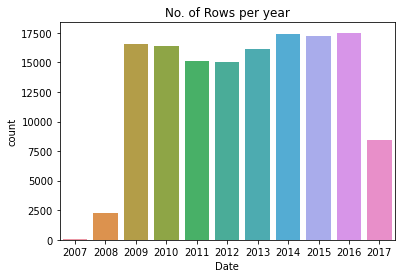

In [16]:
plt.title('No. of Rows per year')
sns.countplot(x = pd.to_datetime(raw_df.Date).dt.year)

In [7]:
# model is trained on the data from past & evaluated on data from future
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

In [18]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (98988, 23)
val_df.shape : (17231, 23)
test_df.shape : (25974, 23)


In [8]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [9]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [10]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [11]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [12]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [25]:
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [26]:
print(categorical_cols)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [13]:
# IMPUTE/FILL IN MISSING VALUES
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'mean').fit(raw_df[numeric_cols])

In [14]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [15]:
test_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [16]:
# SCALING NUMERIC FEATURES
# so that no single feature has disproportional impact on the loss
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(raw_df[numeric_cols])

In [17]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [18]:
val_inputs.describe().loc[['min', 'max']]

MinTemp   MaxTemp  Rainfall  ...  Cloud3pm   Temp9am   Temp3pm
min  0.007075  0.030246  0.000000  ...  0.000000  0.021097  0.026871
max  0.952830  0.948960  0.666307  ...  0.888889  0.943038  0.925144

[2 rows x 16 columns]

In [19]:
# ENCODING CATEGOR DATA
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(raw_df[categorical_cols])

In [20]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [21]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [22]:
test_inputs

Location   MinTemp   MaxTemp  ...  RainToday_No  RainToday_Yes  RainToday_nan
2498     Albury  0.681604  0.801512  ...           1.0            0.0            0.0
2499     Albury  0.693396  0.725898  ...           1.0            0.0            0.0
2500     Albury  0.634434  0.527410  ...           0.0            1.0            0.0
2501     Albury  0.608491  0.538752  ...           0.0            1.0            0.0
2502     Albury  0.566038  0.523629  ...           0.0            1.0            0.0
...         ...       ...       ...  ...           ...            ...            ...
145454    Uluru  0.283019  0.502836  ...           1.0            0.0            0.0
145455    Uluru  0.266509  0.533081  ...           1.0            0.0            0.0
145456    Uluru  0.285377  0.568998  ...           1.0            0.0            0.0
145457    Uluru  0.327830  0.599244  ...           1.0            0.0            0.0
145458    Uluru  0.384434  0.601134  ...           1.0            0.0            0.0

[25974 rows x 124 columns]

In [23]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [24]:
X_test

MinTemp   MaxTemp  ...  RainToday_Yes  RainToday_nan
2498    0.681604  0.801512  ...            0.0            0.0
2499    0.693396  0.725898  ...            0.0            0.0
2500    0.634434  0.527410  ...            1.0            0.0
2501    0.608491  0.538752  ...            1.0            0.0
2502    0.566038  0.523629  ...            1.0            0.0
...          ...       ...  ...            ...            ...
145454  0.283019  0.502836  ...            0.0            0.0
145455  0.266509  0.533081  ...            0.0            0.0
145456  0.285377  0.568998  ...            0.0            0.0
145457  0.327830  0.599244  ...            0.0            0.0
145458  0.384434  0.601134  ...            0.0            0.0

[25974 rows x 119 columns]

###Training & Visualizing Decision Trees
- represents a hierarchical series of binary decisions

In [25]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)

In [26]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(random_state=42)

In [27]:
# evaluation using accuracy score
from sklearn.metrics import accuracy_score, confusion_matrix

train_preds = model.predict(X_train)
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [28]:
pd.value_counts(train_preds)

No     76707
Yes    22281
dtype: int64

Decision tree also returns probabilities for each prediction:

In [29]:
train_probs = model.predict_proba(X_train)
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [30]:
accuracy_score(train_targets, train_preds)
# evaluate on the val set too!

0.9999797955307714

In [31]:
model.score(X_val, val_targets)

0.7921188555510418

In [32]:
val_targets.value_counts() / len(val_targets)
# overfitting

No     0.788289
Yes    0.211711
Name: RainTomorrow, dtype: float64

###Visualization 

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]'),
 Text(0.25, 0.625, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439, 11979]'),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538, 7714]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]'),
 Text(0.625, 0.375, 'WindGustSpeed <= 0.279\ngini = 0.499\nsamples = 9136\nvalue = [4804, 4332]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Rainfall <= 0.01\ngini = 0.316\nsamples = 7434\nvalue = [1462, 5972]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

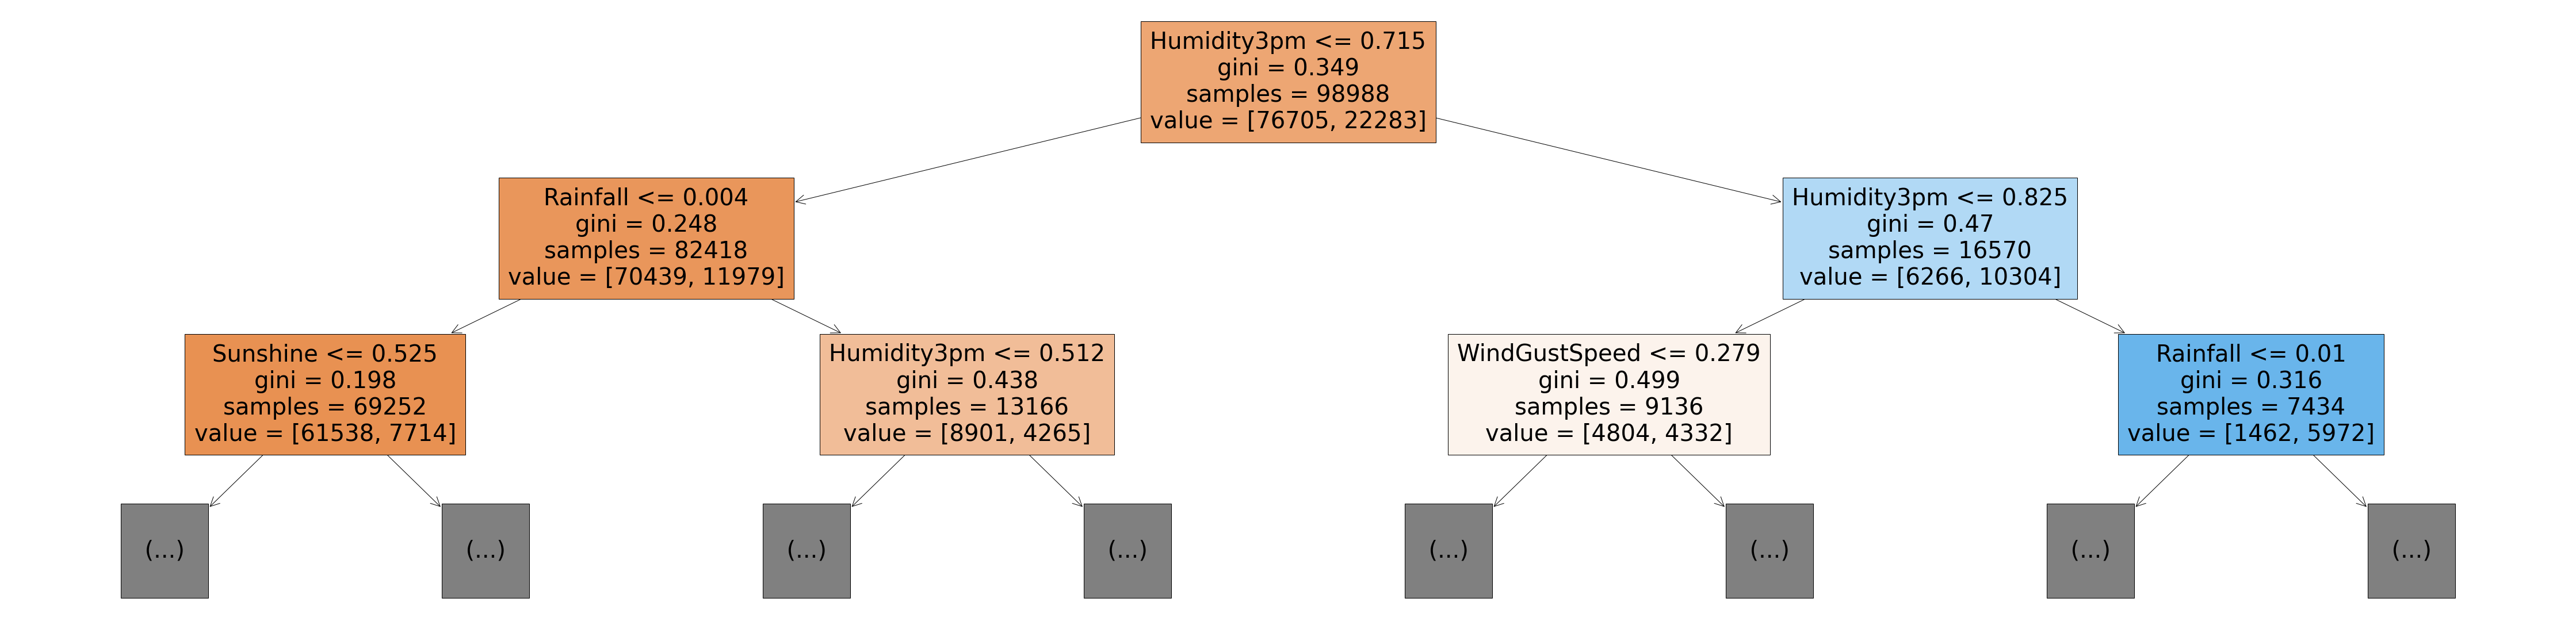

In [33]:
from sklearn.tree import plot_tree, export_text

plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True)

**Gini value** is the loss function used by decision tree to decide which column should be used for splitting data & at what point the column should be split. 
- lower Gini index indicates a better split (Gini = 0, perfect split)


In [34]:
model.tree_.max_depth

48

In [35]:
tree_text = export_text(model, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |--- Location_Watsonia <= 0.50
|   |   |   |   |   |   |   |   |--- Cloud9am <= 0.83
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.07
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm <= 0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm >  0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.07
|   |   |   |   |   |   |   |   |   |   |--- MinTemp <= 0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- MinTemp >  0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated

###Feature importance
- based on the Gini index computations, decision tree assigns an "importance" value to each feature

In [36]:
model.feature_importances_

array([3.48942086e-02, 3.23605486e-02, 5.91385668e-02, 2.49619907e-02,
       4.94652143e-02, 5.63334673e-02, 2.80205998e-02, 2.98128801e-02,
       4.02182908e-02, 2.61441297e-01, 3.44145027e-02, 6.20573699e-02,
       1.36406176e-02, 1.69229866e-02, 3.50001550e-02, 3.04064076e-02,
       2.24086587e-03, 2.08018104e-03, 1.27475954e-03, 7.26936324e-04,
       1.39779517e-03, 1.15264873e-03, 6.92808159e-04, 1.80675598e-03,
       1.08370901e-03, 1.19773895e-03, 8.87119103e-04, 2.15764220e-03,
       1.67094731e-03, 7.98919493e-05, 1.10558668e-03, 1.42008656e-03,
       4.10087635e-04, 1.09028115e-03, 1.44164766e-03, 9.08284767e-04,
       1.05770304e-03, 6.18133455e-04, 1.80387272e-03, 2.10403527e-03,
       2.74413333e-04, 7.31599405e-04, 1.35408990e-03, 1.54759332e-03,
       1.30917564e-03, 1.07134670e-03, 8.36408023e-04, 1.62662229e-03,
       1.00326116e-03, 2.16053455e-03, 8.46802258e-04, 1.88919081e-03,
       9.29325203e-04, 1.29545157e-03, 1.27604831e-03, 5.12736888e-04,
      

In [37]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [38]:
importance_df.head(10)

feature  importance
9     Humidity3pm    0.261441
11    Pressure3pm    0.062057
2        Rainfall    0.059139
5   WindGustSpeed    0.056333
4        Sunshine    0.049465
8     Humidity9am    0.040218
14        Temp9am    0.035000
0         MinTemp    0.034894
10    Pressure9am    0.034415
1         MaxTemp    0.032361

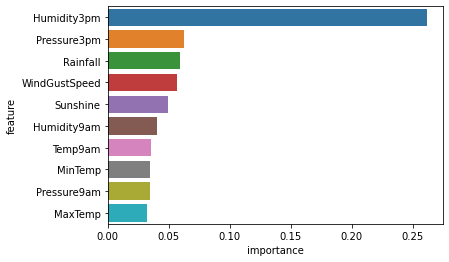

In [39]:
sns.barplot(data=importance_df.head(10), x='importance', y='feature')

- reducing max_depth prevents tree from memorizing all training examples -> leads to better generalization (train_accuracy goes down, but val_accuracy goes up)

In [40]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)

In [41]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [42]:
model.score(X_train, train_targets)

0.8291308037337859

In [43]:
model.score(X_val, val_targets)

0.8334397307178921

In [44]:
model.classes_

array(['No', 'Yes'], dtype=object)

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]\nclass = No'),
 Text(0.25, 0.625, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439, 11979]\nclass = No'),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538, 7714]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.363\nsamples = 12620\nvalue = [9618, 3002]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.153\nsamples = 56632\nvalue = [51920, 4712]\nclass = No'),
 Text(0.375, 0.375, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.293\nsamples = 4299\nvalue = [3531, 768]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.478\nsamples = 8867\nvalue = [5370, 3497]\nclass = No'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]\nclass = Yes'),
 Text(0.625, 0.375, 'WindGustSpeed <= 0.279\ngini = 0.499\nsamples = 9136\nvalue = [4804, 4332]\ncla

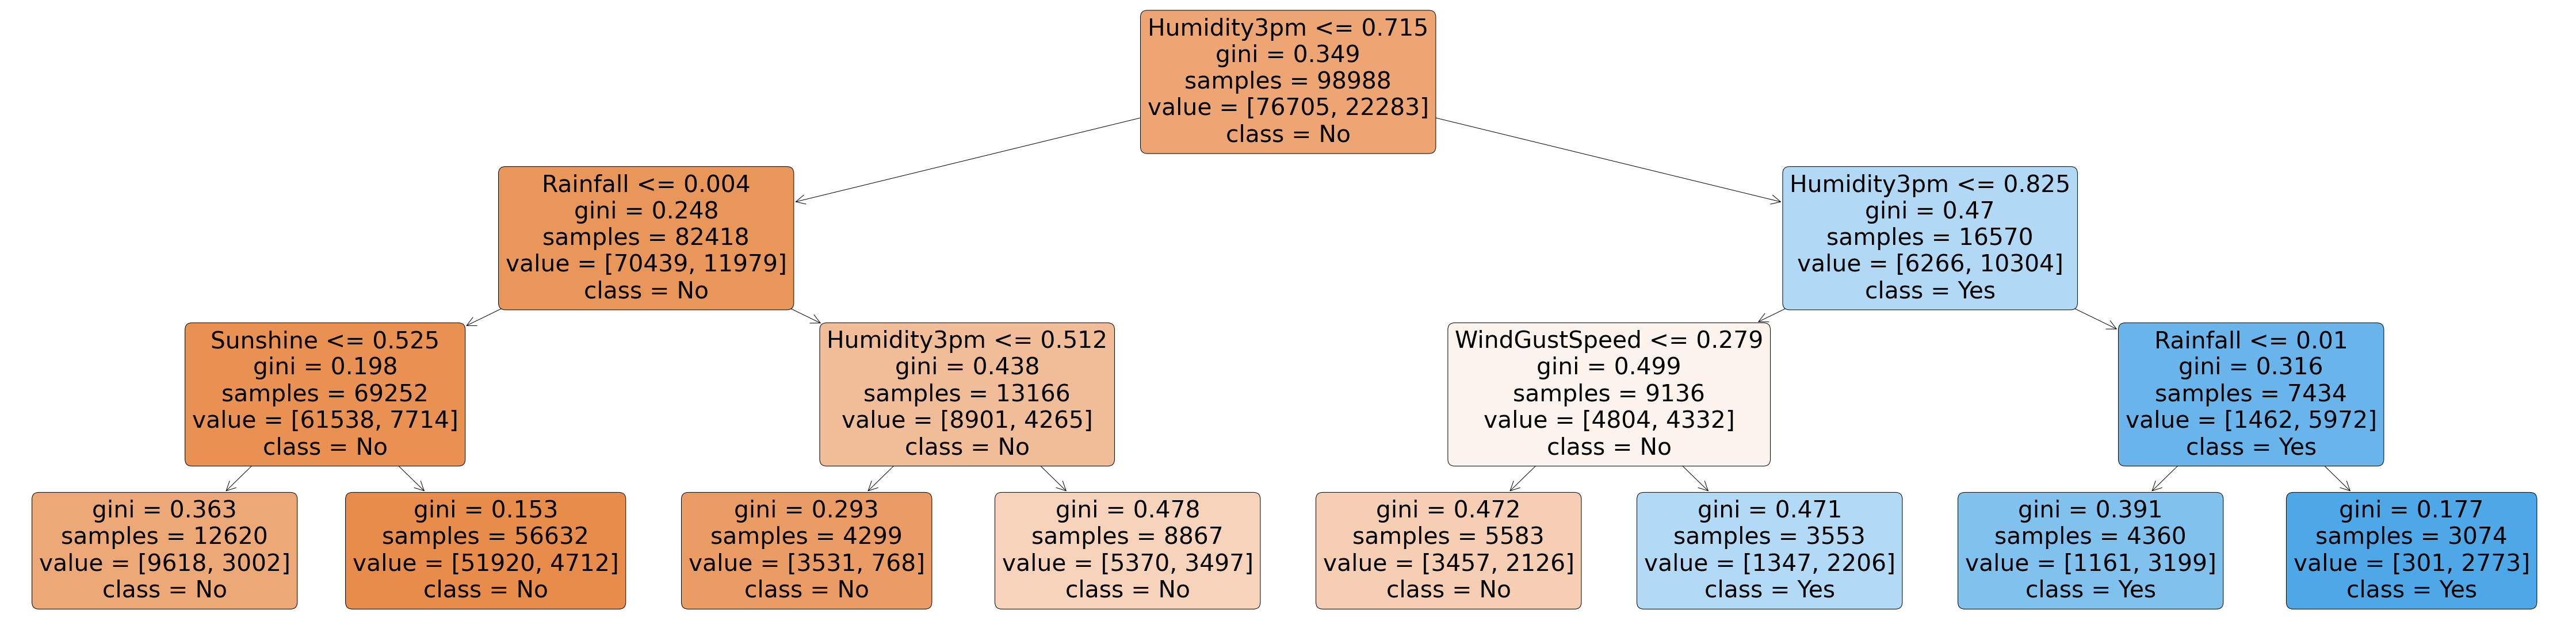

In [45]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_)

In [46]:
print(export_text(model, feature_names=list(X_train.columns)))

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- class: No
|   |   |--- Sunshine >  0.52
|   |   |   |--- class: No
|   |--- Rainfall >  0.00
|   |   |--- Humidity3pm <= 0.51
|   |   |   |--- class: No
|   |   |--- Humidity3pm >  0.51
|   |   |   |--- class: No
|--- Humidity3pm >  0.72
|   |--- Humidity3pm <= 0.82
|   |   |--- WindGustSpeed <= 0.28
|   |   |   |--- class: No
|   |   |--- WindGustSpeed >  0.28
|   |   |   |--- class: Yes
|   |--- Humidity3pm >  0.82
|   |   |--- Rainfall <= 0.01
|   |   |   |--- class: Yes
|   |   |--- Rainfall >  0.01
|   |   |   |--- class: Yes



In [47]:
def max_depth_error(md):
  model = DecisionTreeClassifier(max_depth=md, random_state=42)
  model.fit(X_train, train_targets)
  train_acc = 1 - model.score(X_train, train_targets)
  val_acc = 1 - model.score(X_val, val_targets)
  return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [48]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)]) 

CPU times: user 42.9 s, sys: 50.5 ms, total: 43 s
Wall time: 43.4 s


In [49]:
errors_df

Max Depth  Training Error  Validation Error
0           1        0.184315          0.177935
1           2        0.179547          0.172712
2           3        0.170869          0.166560
3           4        0.165707          0.164355
4           5        0.160676          0.159074
5           6        0.156271          0.157275
6           7        0.153312          0.154605
7           8        0.147806          0.158029
8           9        0.140906          0.156578
9          10        0.132945          0.157333
10         11        0.123227          0.159248
11         12        0.113489          0.160815
12         13        0.101750          0.163833
13         14        0.089981          0.167373
14         15        0.078999          0.171261
15         16        0.068180          0.174279
16         17        0.058138          0.176890
17         18        0.048733          0.181243
18         19        0.040025          0.187569
19         20        0.032539          0.190297

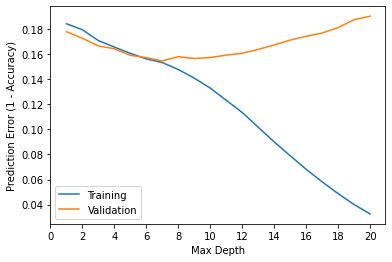

In [50]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.xticks(range(0, 21, 2))
plt.xlabel('Max Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

at max_depth = 7, we have the best val accuracy 

To find optimal fit u need to tune hyperparameters

In [51]:
model = DecisionTreeClassifier(max_depth=7, random_state=42).fit(X_train, train_targets)
model.score(X_val, val_targets)

0.8453949277465034

Another way to control the size of complexity of decision tree is to limit number of leaf nodes -> allows branches of tree to have varying depth.

In [52]:
model = DecisionTreeClassifier(max_leaf_nodes = 128, random_state=42)
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [53]:
model.score(X_train, train_targets)

0.8480421869317493

In [54]:
model.score(X_val, val_targets)

0.8442342290058615

In [55]:
model.tree_.max_depth

12

In [56]:
model_text = export_text(model, feature_names=list(X_train.columns))
print(model_text[:3000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Humidity3pm >  0.28
|   |   |   |   |   |   |--- Sunshine <= 0.05
|   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |--- Sunshine >  0.05
|   |   |   |   |   |   |   |--- Pressure3pm <= 0.43
|   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- Pressure3pm >  0.43
|   |   |   |   |   |   |   |   |--- Humidity3pm <= 0.57
|   |   |   |   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindD

###Training a Random Forest 
- averaging/combining results of several decision trees trained with slightly different parameters

Idea: each decision tree in the forest will make different errors, upon averaging, many of their errors will cancel out - "wisdom of the crowd"

In [57]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_jobs=-1, random_state=42)
# ensures we get the same result for each execution
# n_jobs allows random forest to use multiple parallel workers to train decision trees, using all threads

In [60]:
model.fit(X_train, train_targets)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [61]:
model.score(X_train, train_targets)

0.9999494888269285

In [62]:
model.score(X_val, val_targets)
# this time validation accuracy is much better

0.8566537055307295

So, when we average the results, most errors of individual models cancel out

In [65]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

probability of class is the fraction of trees which predicted the given class

In [63]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.93, 0.07],
       [1.  , 0.  ],
       [0.99, 0.01],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.96, 0.04]])

In [64]:
# access individual decision tree
model.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=1608637542)

[Text(0.5, 0.875, 'Sunshine <= 0.403\ngini = 0.347\nsamples = 62607\nvalue = [76887, 22101]'),
 Text(0.25, 0.625, 'Pressure9am <= 0.609\ngini = 0.499\nsamples = 11288\nvalue = [9272, 8542]'),
 Text(0.125, 0.375, 'Cloud9am <= 0.833\ngini = 0.475\nsamples = 6067\nvalue = [3702, 5808]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'WindGustDir_NNE <= 0.5\ngini = 0.442\nsamples = 5221\nvalue = [5570, 2734]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'RainToday_Yes <= 0.5\ngini = 0.278\nsamples = 51319\nvalue = [67615, 13559]'),
 Text(0.625, 0.375, 'Pressure9am <= 0.521\ngini = 0.207\nsamples = 41960\nvalue = [58514, 7796]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Pressure9am <= 0.614\ngini = 0.475\nsamples = 9359\nvalue = [9101, 5763]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

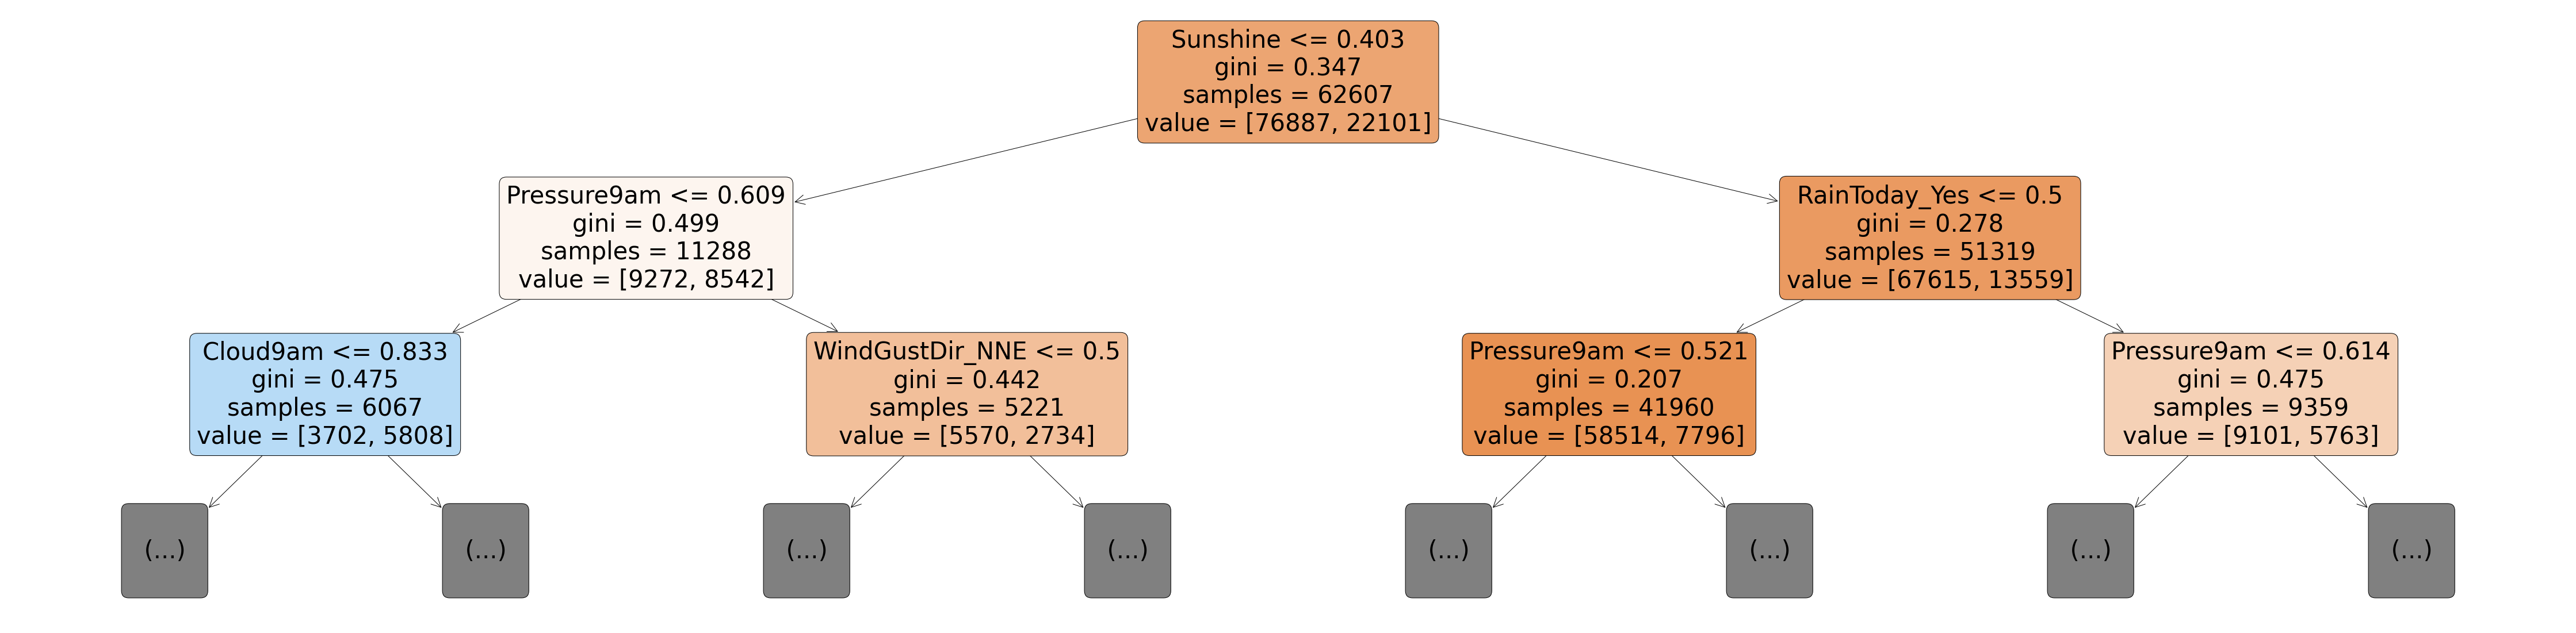

In [66]:
plt.figure(figsize=(80, 20))
plot_tree(model.estimators_[0], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True)

In [67]:
len(model.estimators_)

100

[Text(0.5, 0.875, 'WindSpeed9am <= 0.162\ngini = 0.345\nsamples = 62577\nvalue = [77041, 21947]'),
 Text(0.25, 0.625, 'Humidity3pm <= 0.705\ngini = 0.327\nsamples = 50577\nvalue = [63618, 16524]'),
 Text(0.125, 0.375, 'RainToday_Yes <= 0.5\ngini = 0.227\nsamples = 41880\nvalue = [57729, 8682]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Rainfall <= 0.004\ngini = 0.49\nsamples = 8697\nvalue = [5889, 7842]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'WindGustSpeed <= 0.38\ngini = 0.41\nsamples = 12000\nvalue = [13423, 5423]'),
 Text(0.625, 0.375, 'Cloud3pm <= 0.722\ngini = 0.325\nsamples = 7445\nvalue = [9369, 2402]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Cloud9am <= 0.389\ngini = 0.489\nsamples = 4555\nvalue = [4054, 3021]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

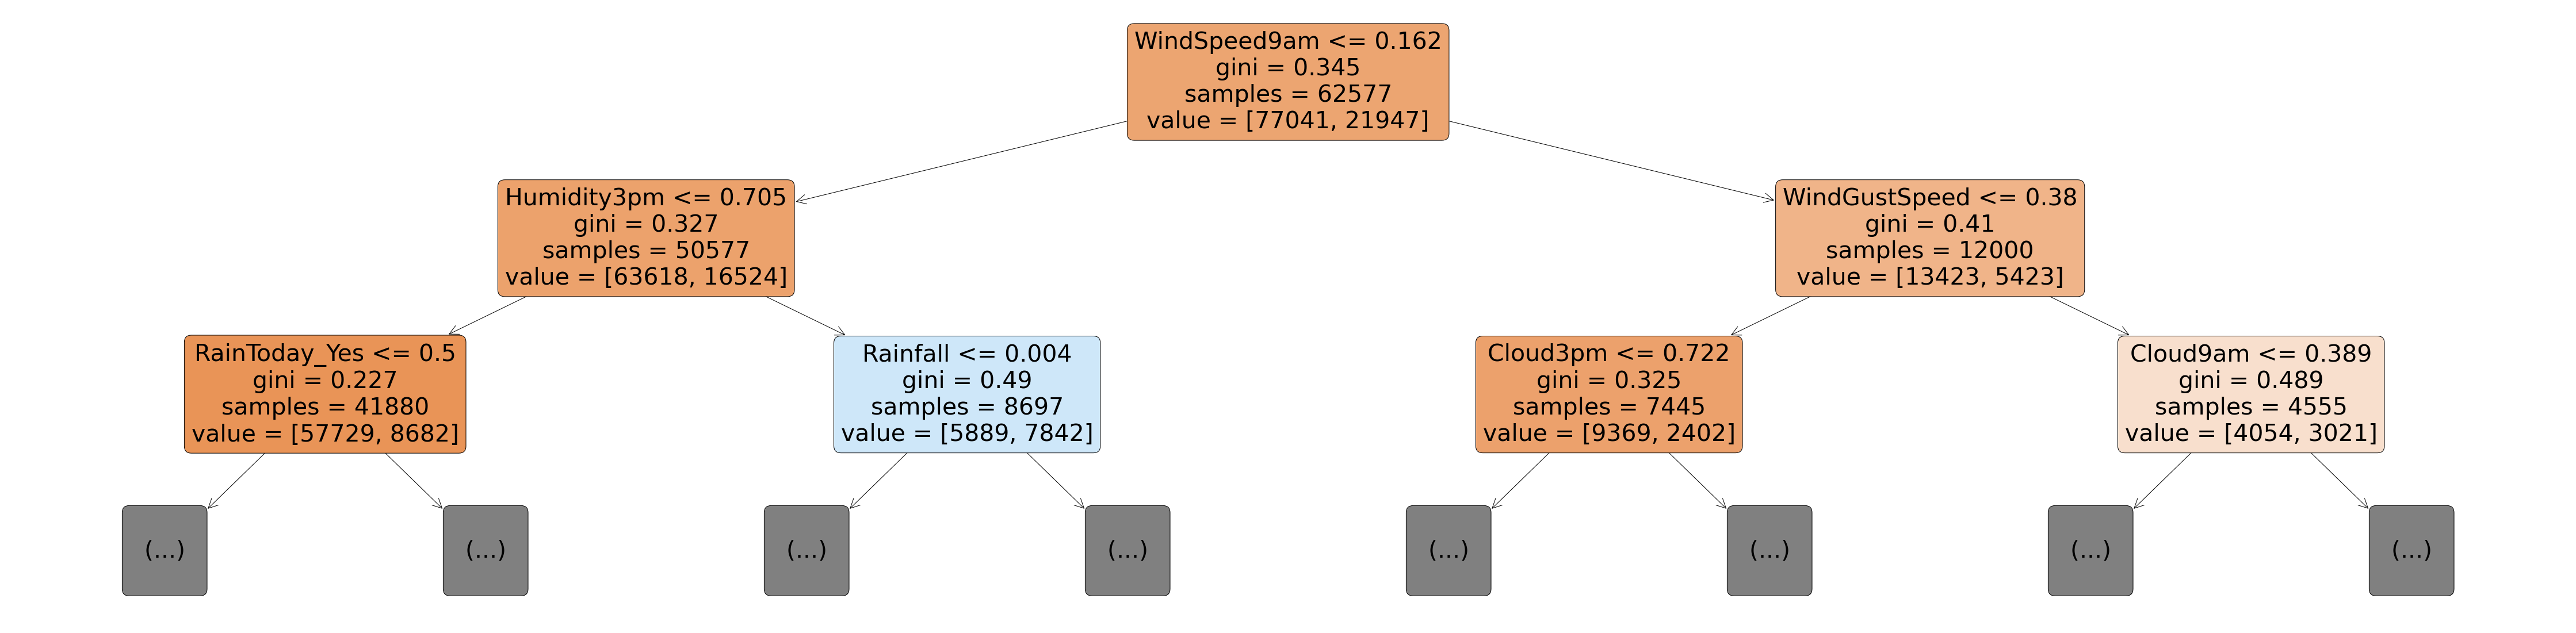

In [69]:
plt.figure(figsize=(80, 20))
plot_tree(model.estimators_[10], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True)

none of individual decision tree have a better validation accuracy than the random forest (combination of the decision trees).

In [70]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [71]:
importance_df.head(10)

feature  importance
9     Humidity3pm    0.139904
4        Sunshine    0.053696
11    Pressure3pm    0.052713
8     Humidity9am    0.050051
2        Rainfall    0.048077
10    Pressure9am    0.047944
5   WindGustSpeed    0.047477
15        Temp3pm    0.044379
1         MaxTemp    0.041865
0         MinTemp    0.041199

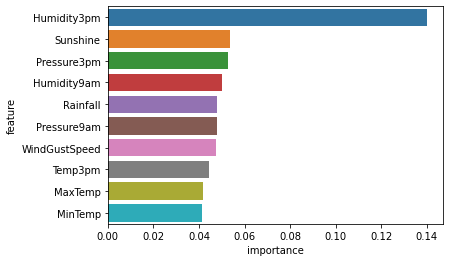

In [72]:
sns.barplot(data=importance_df.head(10), x='importance', y='feature')

distribution is less skewed than for a single decision tree.

Let's create a base model to compare models with tuned hyperparameters

In [73]:
base_model = RandomForestClassifier(n_jobs=-1, random_state=42).fit(X_train, train_targets)

In [74]:
base_train_acc = base_model.score(X_train, train_targets)
base_val_acc = base_model.score(X_val, val_targets)

In [75]:
base_accs = base_train_acc, base_val_acc
base_accs
# baseline for our comparison

(0.9999494888269285, 0.8566537055307295)

**randomness** helps to **reduce** **overfitting**

In [79]:
# n_estimators - controls # of decision trees in the random forest
model = RandomForestClassifier(n_jobs=-1, random_state=42, n_estimators=500).fit(X_train, train_targets)

In [80]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9999797955307714, 0.8577563693343393)

for a financial model that's a significant number

In [78]:
base_accs

(0.9999494888269285, 0.8566537055307295)

consider params: **max_depth**, **max_leaf_nodes**

In [86]:
def test_params(**params):
  model = RandomForestClassifier(n_jobs=-1, random_state=42, **params).fit(X_train, train_targets)
  return model.score(X_train, train_targets), model.score(X_val, val_targets)

In [90]:
test_params(max_depth=26)

(0.9814826039519942, 0.8572340549010504)

In [89]:
test_params(max_leaf_nodes=2**5)

(0.8314341132258456, 0.833904010214149)

**max_features**
- specify only a fraction of features to be chosen randomly to figure out split

default value *auto* causes only sqrt(n) features to be chosen randomly at each split

In [91]:
X_train.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W',
       'WindDir3pm_WNW', 'WindDir3pm_WSW', 'WindDir3pm_nan', 'RainToday_No',
       'RainToday_Yes', 'RainToday_nan'],
      dtype='object', length=119)

In our case, every split (decision tree) looks at ~ 11 features, and each tree is different.

It's logical that choosing all features for every split of every tree will lead to identical trees -> random forest will not generalize well :(

each split (in the same tree or across different tree) is randomized because it uses only a certain fraction of columns

In [92]:
test_params(max_features='log2')

(0.9999595910615429, 0.8558992513493123)

In [93]:
test_params(max_features=8)

(0.9999595910615429, 0.8549706923567988)

**min_samples_split**, **min_samples_leaf**: min size for splitting node & min size for a leaf node to be created when u split the node 
- tries to split 2 or > rows of data inside it

In [94]:
test_params(min_samples_split=5, min_samples_leaf=2)
# the node will be split only if there are 5 rows of data inside it & leafs have 2 rows of data each

(0.9573584676930537, 0.855144797167895)

**min_impurity_decrease**
- used to control the threshold for splitting nodes

Node will be split only when the decrease in impurity (Gini index) > or = to this certain value 

In [96]:
test_params(min_impurity_decrease=1e-6)

(0.9888168262819735, 0.8561313910974406)

**bootstrap**, **max_samples**
- for each tree, rows from dataset are picked at random with replacement (some rows may even not show up)
- it help random forest generalize better as decision trees see only fraction of training set & some rows get higher weightage than others (as u may pick them twice)

In [97]:
test_params(bootstrap=False)

(0.9999797955307714, 0.8567697754047937)

In [99]:
test_params(max_samples=0.9)
# picking bootstrap of just 90% of rows with replacement as by default 'bootstrap=True'

(0.9997676486038711, 0.8565376356566653)

**class_weight**

In [102]:
train_targets.value_counts() / len(train_targets)

No     0.774892
Yes    0.225108
Name: RainTomorrow, dtype: float64

Probably want to give higher weight to rows with class 'Yes' - low number of rows, consider in the tree x3 important

In [101]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [103]:
test_params(class_weight='balanced')

(0.9999595910615429, 0.8553769369160235)

In [104]:
test_params(class_weight={'No': 1, 'Yes':3})
# each row of class 'Yes' with have a weight of 3

(0.9999595910615429, 0.8529394695606756)

####Putting together

In [108]:
model = RandomForestClassifier(n_jobs=-1, random_state=42, n_estimators=400, max_features=8, max_depth=28, class_weight={'No': 1, 'Yes': 2})

In [109]:
model.fit(X_train, train_targets)

RandomForestClassifier(class_weight={'No': 1, 'Yes': 2}, max_depth=28,
                       max_features=8, n_estimators=400, n_jobs=-1,
                       random_state=42)

In [110]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.992645573200792, 0.8561894260344728)

In [111]:
model.score(X_test, test_targets)
# test accuracy is lower

0.8444983444983445

# Gradient Boosting with XGBoost & LightGBM

- performing feature engineering & prepare data for training
- training & interpreting a gradient boosting model using XGBoost
- training with KFold cross validation & ensembling results 
- configuring gradient boosting model & tuning hyperparameters 

Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied."

### Task: forecast "Sales" column for test set

In [ ]:
# Data Reading
train = pd.read_csv('https://raw.githubusercontent.com/RPI-DATA/tutorials-intro/master/rossmann-store-sales/rossmann-store-sales/train.csv', low_memory = False)
store = pd.read_csv('https://raw.githubusercontent.com/RPI-DATA/tutorials-intro/master/rossmann-store-sales/rossmann-store-sales/store.csv', low_memory = False)

# train = pd.read_csv('https://raw.githubusercontent.com/RPI-DATA/tutorials-intro/master/rossmann-store-sales/rossmann-store-sales/train.csv', parse_dates = True, low_memory = False, index_col = 'Date')

In [ ]:
train.head()

Store  DayOfWeek        Date  Sales  ...  Open  Promo  StateHoliday SchoolHoliday
0      1          5  2015-07-31   5263  ...     1      1             0             1
1      2          5  2015-07-31   6064  ...     1      1             0             1
2      3          5  2015-07-31   8314  ...     1      1             0             1
3      4          5  2015-07-31  13995  ...     1      1             0             1
4      5          5  2015-07-31   4822  ...     1      1             0             1

[5 rows x 9 columns]

In [ ]:
store.head()

Store StoreType  ... Promo2SinceYear    PromoInterval
0      1         c  ...             NaN              NaN
1      2         a  ...          2010.0  Jan,Apr,Jul,Oct
2      3         a  ...          2011.0  Jan,Apr,Jul,Oct
3      4         c  ...             NaN              NaN
4      5         a  ...             NaN              NaN

[5 rows x 10 columns]

- see which variables are continuous vs which are categorical
- after exploring data, we can create a feature: # of sales divided by customers could give us a good metric to measure average sales per customer. 

We can also make an assumption that if we have missing values in this column that we have 0 customers. Since customers drive sales, we elect to remove all of these values.

In [ ]:
train.describe()

Store     DayOfWeek  ...         Promo  SchoolHoliday
count  1.017209e+06  1.017209e+06  ...  1.017209e+06   1.017209e+06
mean   5.584297e+02  3.998341e+00  ...  3.815145e-01   1.786467e-01
std    3.219087e+02  1.997391e+00  ...  4.857586e-01   3.830564e-01
min    1.000000e+00  1.000000e+00  ...  0.000000e+00   0.000000e+00
25%    2.800000e+02  2.000000e+00  ...  0.000000e+00   0.000000e+00
50%    5.580000e+02  4.000000e+00  ...  0.000000e+00   0.000000e+00
75%    8.380000e+02  6.000000e+00  ...  1.000000e+00   0.000000e+00
max    1.115000e+03  7.000000e+00  ...  1.000000e+00   1.000000e+00

[8 rows x 7 columns]

Let's merge info from store_df to train_df 

In [ ]:
merged_df = train.merge(store, how='left', on='Store')

In [ ]:
missing = train.isnull().sum()
missing.sort_values(ascending=False)

SchoolHoliday    0
StateHoliday     0
Promo            0
Open             0
Customers        0
Sales            0
Date             0
DayOfWeek        0
Store            0
dtype: int64

In [ ]:
# creating a metric
train['SalesPerCustomer'] = train['Sales']/train['Customers']
train['SalesPerCustomer'].head()

0     9.482883
1     9.702400
2    10.126675
3     9.342457
4     8.626118
Name: SalesPerCustomer, dtype: float64

In [ ]:
missing = train.isnull().sum()
missing.sort_values(ascending=False)

SalesPerCustomer    172869
SchoolHoliday            0
StateHoliday             0
Promo                    0
Open                     0
Customers                0
Sales                    0
Date                     0
DayOfWeek                0
Store                    0
dtype: int64

In [ ]:
#train.dropna().head()

Store  DayOfWeek        Date  ...  StateHoliday  SchoolHoliday  SalesPerCustomer
0      1          5  2015-07-31  ...             0              1          9.482883
1      2          5  2015-07-31  ...             0              1          9.702400
2      3          5  2015-07-31  ...             0              1         10.126675
3      4          5  2015-07-31  ...             0              1          9.342457
4      5          5  2015-07-31  ...             0              1          8.626118

[5 rows x 10 columns]

If we find that our model is fitting too closely to our training data (overfitting), our data will not be able to generalize new data.

If our model is not fitting closely enough to our training data (underfitting), our data has too much bias.

Underfitting: increase changepoint to allow more flexibility 

Overfitting: decrease changepoint to limit flexibility

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


look at available columns and figure out if we can create new columns or apply any useful transformations

In [ ]:
# with the help of merge
def split_date(df):
  df['Date'] = pd.to_datetime(df['Date'])
  df['Year'] = df.Date.dt.year
  df['Month'] = df.Date.dt.month
  df['Day'] = df.Date.dt.day
  df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [ ]:
split_date(merged_df)

In [ ]:
merged_df

Store  DayOfWeek       Date  Sales  ...  Year  Month  Day WeekOfYear
0            1          5 2015-07-31   5263  ...  2015      7   31         31
1            2          5 2015-07-31   6064  ...  2015      7   31         31
2            3          5 2015-07-31   8314  ...  2015      7   31         31
3            4          5 2015-07-31  13995  ...  2015      7   31         31
4            5          5 2015-07-31   4822  ...  2015      7   31         31
...        ...        ...        ...    ...  ...   ...    ...  ...        ...
1017204   1111          2 2013-01-01      0  ...  2013      1    1          1
1017205   1112          2 2013-01-01      0  ...  2013      1    1          1
1017206   1113          2 2013-01-01      0  ...  2013      1    1          1
1017207   1114          2 2013-01-01      0  ...  2013      1    1          1
1017208   1115          2 2013-01-01      0  ...  2013      1    1          1

[1017209 rows x 22 columns]

when store is closed -> there are no sales 

In [ ]:
merged_df[merged_df.Open == 0].Sales.value_counts()

0    172817
Name: Sales, dtype: int64

In [ ]:
merged_df[merged_df.Open == 0].Sales

291        0
875        0
1406       0
1990       0
2521       0
          ..
1017204    0
1017205    0
1017206    0
1017207    0
1017208    0
Name: Sales, Length: 172817, dtype: int64

In [ ]:
# use data when the store is opened, remove the closed dates
merged_df = merged_df[merged_df.Open == 1].copy()

We may compute the number of months for which a competitor has been opened near the store

In [ ]:
def comp_months(df):
  df['CompetitionOpen'] = 12*(df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
  df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)
  #replaces negative value with 0
  # no competing store at the momemnt, but it will open in the future

In [ ]:
comp_months(merged_df)

In [ ]:
merged_df

Store  DayOfWeek       Date  ...  Day  WeekOfYear  CompetitionOpen
0            1          5 2015-07-31  ...   31          31             82.0
1            2          5 2015-07-31  ...   31          31             92.0
2            3          5 2015-07-31  ...   31          31            103.0
3            4          5 2015-07-31  ...   31          31             70.0
4            5          5 2015-07-31  ...   31          31              3.0
...        ...        ...        ...  ...  ...         ...              ...
1016776    682          2 2013-01-01  ...    1           1             76.0
1016827    733          2 2013-01-01  ...    1           1            159.0
1016863    769          2 2013-01-01  ...    1           1              0.0
1017042    948          2 2013-01-01  ...    1           1              0.0
1017190   1097          2 2013-01-01  ...    1           1            130.0

[844392 rows x 23 columns]

In [ ]:
merged_df[['Date', 'CompetitionDistance',	'CompetitionOpenSinceMonth',	'CompetitionOpenSinceYear', 'CompetitionOpen']]

Date  ...  CompetitionOpen
0       2015-07-31  ...             82.0
1       2015-07-31  ...             92.0
2       2015-07-31  ...            103.0
3       2015-07-31  ...             70.0
4       2015-07-31  ...              3.0
...            ...  ...              ...
1016776 2013-01-01  ...             76.0
1016827 2013-01-01  ...            159.0
1016863 2013-01-01  ...              0.0
1017042 2013-01-01  ...              0.0
1017190 2013-01-01  ...            130.0

[844392 rows x 5 columns]

### Feature Engineering: to present info in the form that can be most useful for the model

In [ ]:
# how long has the store been running promotion & whether a new round of promo starts in the current month
def check_promo_month(row):
  month2str = {1 : 'Jan', 2 : 'Feb', 3 : 'Mar', 4 : 'Apr', 5 : 'May', 6 :'Jun', 
               7 : 'Jul', 8 : 'Aug', 9 : 'Sept', 10 : 'Oct', 11 : 'Nov', 12 : 'Dec'}
  try:
    months = (row['PromoInterval'] or '').split(',')
    if row['Promo2Open'] and month2str[row['Month']] in months:
      return 1
    else:
      return 0
  except Exception:
    return 0

def promo_cols(df):
  # months since promo2 was open
  df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) + (df.WeekOfYear - df.Promo2SinceWeek) * df['Promo2']
  df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']
  # whether a new round of promotions as started in the current month
  df['IsPromo2Month'] = df.apply(check_promo_month, axis = 1) * df['Promo2']

In [ ]:
promo_cols(merged_df)

In [ ]:
merged_df[['Date', 'Promo2', 'Promo2SinceYear', 'Promo2SinceWeek', 'PromoInterval', 'Promo2Open', 'IsPromo2Month']]

Date  Promo2  ...  Promo2Open  IsPromo2Month
0       2015-07-31       0  ...         0.0              0
1       2015-07-31       1  ...        78.0              1
2       2015-07-31       1  ...        65.0              1
3       2015-07-31       0  ...         0.0              0
4       2015-07-31       0  ...         0.0              0
...            ...     ...  ...         ...            ...
1016776 2013-01-01       0  ...         0.0              0
1016827 2013-01-01       0  ...         0.0              0
1016863 2013-01-01       1  ...         0.0              0
1017042 2013-01-01       0  ...         0.0              0
1017190 2013-01-01       0  ...         0.0              0

[844392 rows x 7 columns]

In [ ]:
merged_df

Store  DayOfWeek  ... Promo2Open  IsPromo2Month
0            1          5  ...        0.0              0
1            2          5  ...       78.0              1
2            3          5  ...       65.0              1
3            4          5  ...        0.0              0
4            5          5  ...        0.0              0
...        ...        ...  ...        ...            ...
1016776    682          2  ...        0.0              0
1016827    733          2  ...        0.0              0
1016863    769          2  ...        0.0              0
1017042    948          2  ...        0.0              0
1017190   1097          2  ...        0.0              0

[844392 rows x 25 columns]

###Input & Target columns
selecting columns which we'll use for training

In [ ]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen', 'Promo2Open', 'IsPromo2Month'],
      dtype='object')

In [ ]:
input_cols = ['Store', 'DayOfWeek',	'Promo',	'StateHoliday',	'SchoolHoliday',
              'StoreType',	'Assortment',	'CompetitionDistance', 'CompetitionOpen',
              'Year',	'Month',	'Day',	'WeekOfYear',	'Promo2Open',	'IsPromo2Month']
# input make an impact on the number of Sales
target_col = ['Sales']

In [ ]:
inputs = merged_df[input_cols].copy()
targets = merged_df[target_col].copy()
# inputs - dataframe (diff data types)
# targets - single series
# sales are not linearly correlated with the day of the week (no linear increase from Mon to Sunday)
# Decision trees can work with both types, pick out using binary decisions (specific branches if Fr, Sun)

In [ ]:
inputs

Store  DayOfWeek  Promo  ... WeekOfYear  Promo2Open IsPromo2Month
0            1          5      1  ...         31         0.0             0
1            2          5      1  ...         31        78.0             1
2            3          5      1  ...         31        65.0             1
3            4          5      1  ...         31         0.0             0
4            5          5      1  ...         31         0.0             0
...        ...        ...    ...  ...        ...         ...           ...
1016776    682          2      0  ...          1         0.0             0
1016827    733          2      0  ...          1         0.0             0
1016863    769          2      0  ...          1         0.0             0
1017042    948          2      0  ...          1         0.0             0
1017190   1097          2      0  ...          1         0.0             0

[844392 rows x 15 columns]

In [ ]:
targets

Sales
0         5263
1         6064
2         8314
3        13995
4         4822
...        ...
1016776   3375
1016827  10765
1016863   5035
1017042   4491
1017190   5961

[844392 rows x 1 columns]

test & train inputs should have same number of columns, otherwise you won't be able to train a model to do predictions on the test set.

Identify numeric & categorical columns
- treat binary categorical columns (0/1, i.e. they're already one-hot encoded) as numeric columns

In [ ]:
numeric_cols = ['Store',	'Promo',	'SchoolHoliday',
                'CompetitionDistance', 'CompetitionOpen',
              'Year',	'Month',	'Day',	'WeekOfYear',	'Promo2Open',	'IsPromo2Month']
categorical_cols = ['DayOfWeek', 'StateHoliday', 'StoreType', 'Assortment']

### Impute missing numerical data

In [ ]:
inputs[numeric_cols].isna().sum()

Store                     0
Promo                     0
SchoolHoliday             0
CompetitionDistance    2186
CompetitionOpen           0
Year                      0
Month                     0
Day                       0
WeekOfYear                0
Promo2Open                0
IsPromo2Month             0
dtype: int64

Competition distance is the only missing value, fill it with the highest value (indicating competiton is far away)

In [ ]:
max_distance = inputs.CompetitionDistance.max()
max_distance

75860.0

In [ ]:
inputs['CompetitionDistance'].fillna(max_distance*2, inplace=True)

###Scaling numeric values (0 to 1 range)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler().fit(inputs[numeric_cols])

In [ ]:
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])

###Encode Categorical Columns
one-hot encode categor columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse = False, handle_unknown='ignore').fit(inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [ ]:
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])

In [ ]:
X = inputs[numeric_cols + encoded_cols]

In [ ]:
X

Store  Promo  ...  Assortment_b  Assortment_c
0        0.000000    1.0  ...           0.0           0.0
1        0.000898    1.0  ...           0.0           0.0
2        0.001795    1.0  ...           0.0           0.0
3        0.002693    1.0  ...           0.0           1.0
4        0.003591    1.0  ...           0.0           0.0
...           ...    ...  ...           ...           ...
1016776  0.611311    0.0  ...           0.0           0.0
1016827  0.657092    0.0  ...           1.0           0.0
1016863  0.689408    0.0  ...           1.0           0.0
1017042  0.850090    0.0  ...           1.0           0.0
1017190  0.983842    0.0  ...           1.0           0.0

[844392 rows x 29 columns]

Didn't create validation set, cause we'll use K-fold cross validation

###Gradient Boosting 
- it computes average value of target column and uses it as an initial prediction of every input (basically the error is high, number of iterations are low)
- we go back to each row of training data & calculate the difference of the actual targets with the predictions (add original predictions with the predicted residual by decision tree, second decision tree corrects the errors done by the first one which reduces the error further)
- create a decision tree of limited depth (train) to predict residuals for each input (correcting the errors of initial guess)
- take the predictions from the decision tree, scale them using learning rate parameter alpha (prevents overfitting to training set)
- the scaled prediction is added to the previous predictions to obtain new & improved predictions
- process is repeated to create new decision trees each of which is trained to predict the residuals from the previous prediction

"gradient" - each tree is trained with purpose of reducing loss from previous iteration (estimator) (iterative gradient descent). 

objective: minimize loss by creating new decision trees (estimators)

"boosting" - training new models to improve results of existing models. 2nd decision tree depends on how the 1st decision tree was created.

in random forest - each decision tree tries to make the entire prediction (bagging)

###Training GBM

In [ ]:
from xgboost import XGBRegressor
# far more efficient & versitile than scikit learn

In [ ]:
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)
# each time we run, we get the same results
# configure the number of threats used in the background (-1 all threads available on the machine we are connected to)
# if we train unbounded decision tree, then it would essentially exactly fit the residual, 
# so it would completely overfit to training set (perform poorly on val set) to predict the residual

In [ ]:
%%time
model.fit(X, targets)

[14:07:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 36.4 s, sys: 303 ms, total: 36.7 s
Wall time: 19.1 s


XGBRegressor(max_depth=4, n_estimators=20, n_jobs=-1, random_state=42)

In [ ]:
# make predictions & evaluate model
preds = model.predict(X)
preds

array([7171.5317, 6886.1143, 7169.387 , ..., 7886.0425, 6096.0024,
       7886.0425], dtype=float32)

In [ ]:
# Evaluate using RMSE
from sklearn.metrics import mean_squared_error

def rmse(a, b):
  return mean_squared_error(a, b, squared=False)

In [ ]:
rmse(preds, targets)
# error/loss on the training set:

2742.412085366369

In [ ]:
merged_df.Sales.min(), merged_df.Sales.max()

(0, 41551)

(array([7.570e+02, 5.113e+03, 3.008e+03, 8.220e+02, 2.110e+02, 6.000e+01,
        2.100e+01, 5.000e+00, 0.000e+00, 3.000e+00]),
 array([    0. ,  3490.4,  6980.8, 10471.2, 13961.6, 17452. , 20942.4,
        24432.8, 27923.2, 31413.6, 34904. ]),
 <a list of 10 Patch objects>)

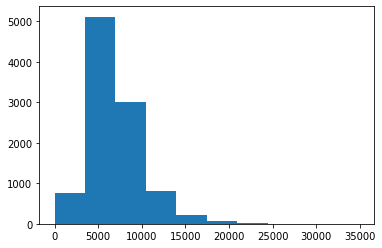

In [ ]:
plt.hist(merged_df.Sales.sample(10000))

for each tree we are reducing what it needs to learn rather then for random forest where each tree has to learn the entire relationship
- here, each tree tries to fix the errors of the previous tree

###Visualize (individual trees)

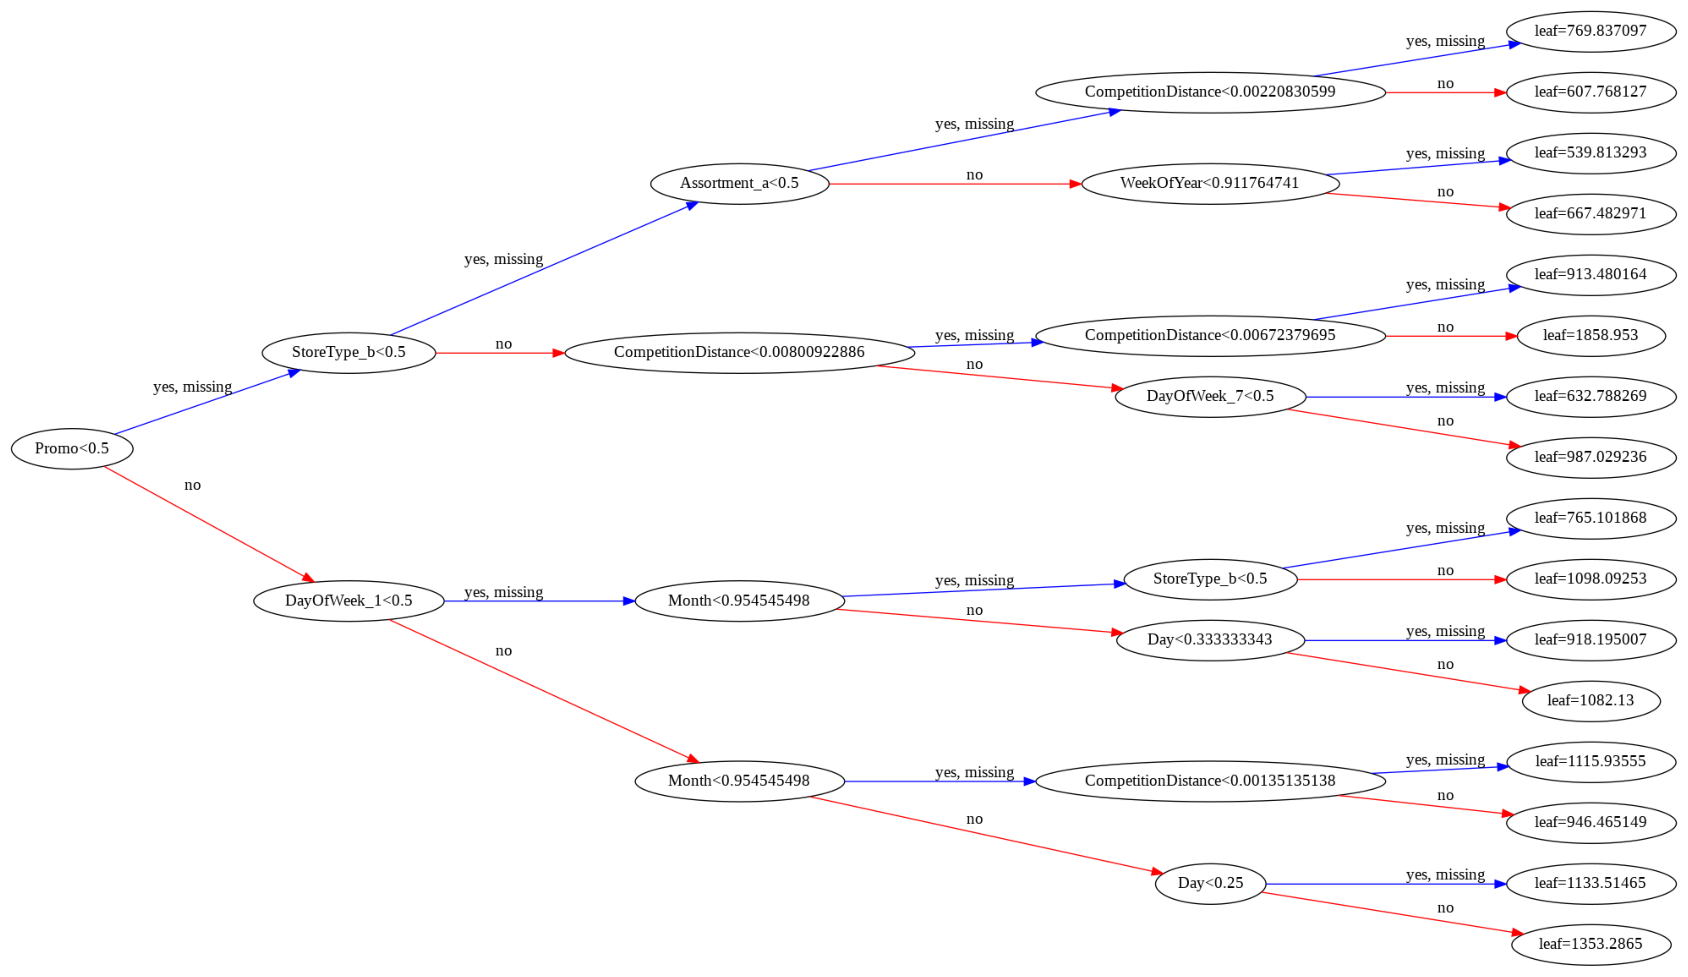

In [ ]:
from xgboost import plot_tree
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 30,30

plot_tree(model, rankdir='LR')
# leaf presents the deviation from the average that we r predicting

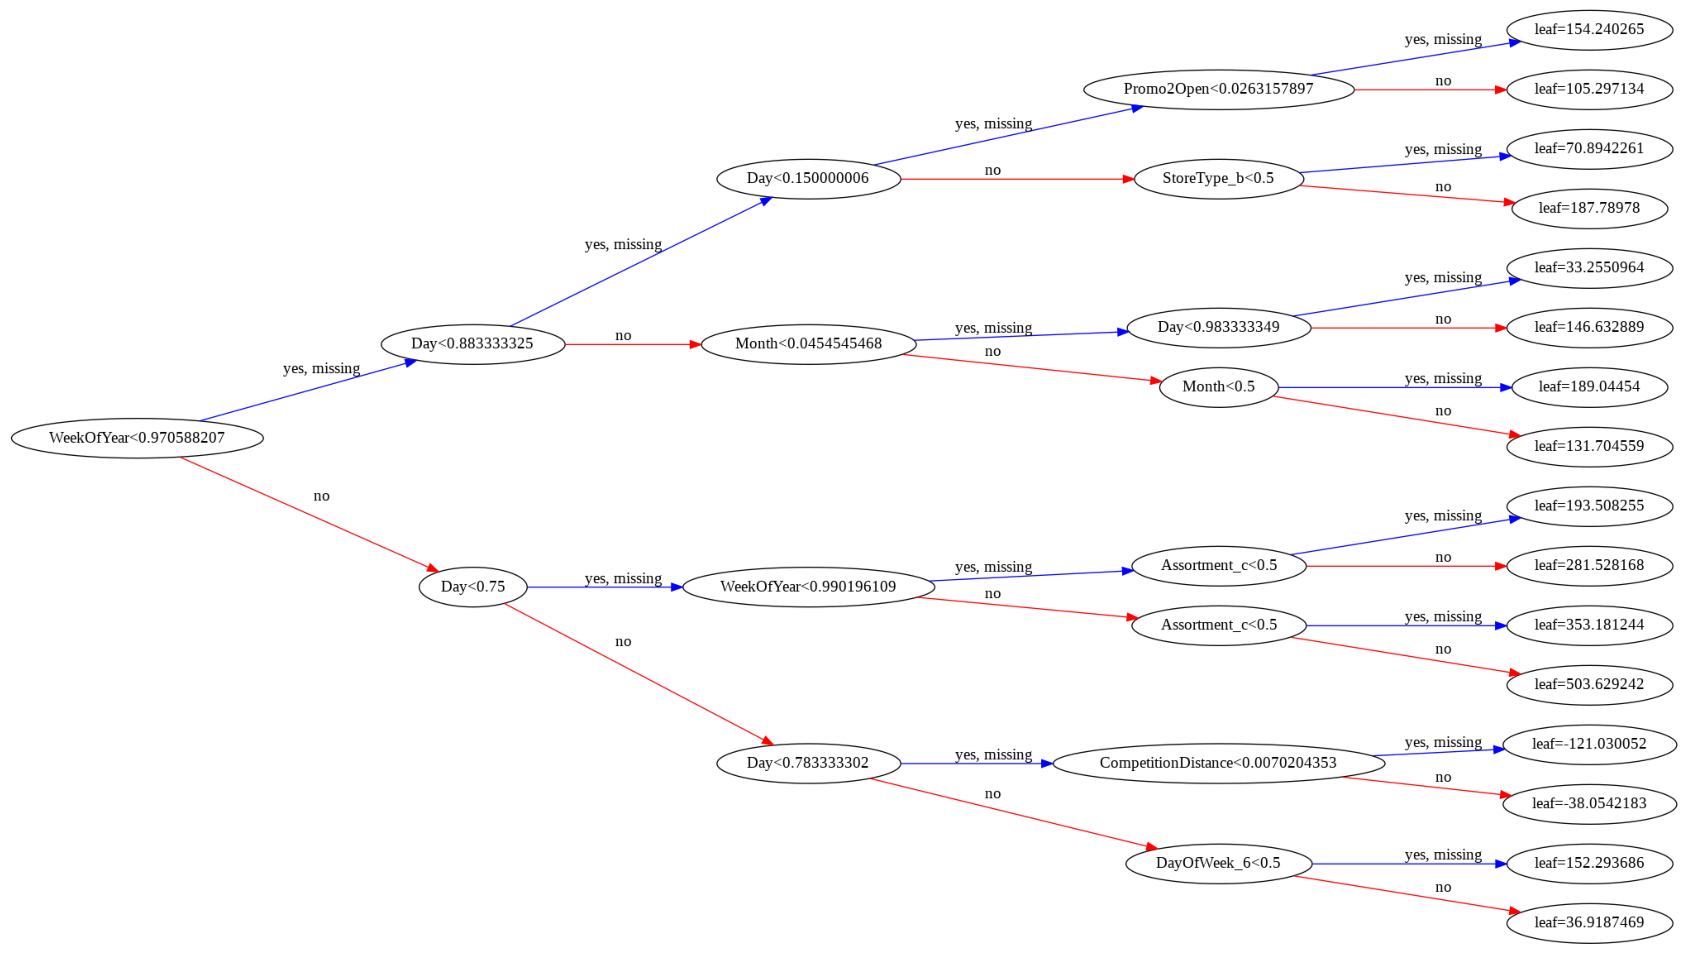

In [ ]:
plot_tree(model, rankdir='LR', num_trees=19)

Note: trees only compute residuals, not the actual target value

In [ ]:
# visualize in a textual format
trees = model.get_booster().get_dump()

In [ ]:
len(trees)

20

In [ ]:
print(trees[0])

0:[Promo<0.5] yes=1,no=2,missing=1
	1:[StoreType_b<0.5] yes=3,no=4,missing=3
		3:[Assortment_a<0.5] yes=7,no=8,missing=7
			7:[CompetitionDistance<0.00220830599] yes=15,no=16,missing=15
				15:leaf=769.837097
				16:leaf=607.768127
			8:[WeekOfYear<0.911764741] yes=17,no=18,missing=17
				17:leaf=539.813293
				18:leaf=667.482971
		4:[CompetitionDistance<0.00800922886] yes=9,no=10,missing=9
			9:[CompetitionDistance<0.00672379695] yes=19,no=20,missing=19
				19:leaf=913.480164
				20:leaf=1858.953
			10:[DayOfWeek_7<0.5] yes=21,no=22,missing=21
				21:leaf=632.788269
				22:leaf=987.029236
	2:[DayOfWeek_1<0.5] yes=5,no=6,missing=5
		5:[Month<0.954545498] yes=11,no=12,missing=11
			11:[StoreType_b<0.5] yes=23,no=24,missing=23
				23:leaf=765.101868
				24:leaf=1098.09253
			12:[Day<0.333333343] yes=25,no=26,missing=25
				25:leaf=918.195007
				26:leaf=1082.13
		6:[Month<0.954545498] yes=13,no=14,missing=13
			13:[CompetitionDistance<0.00135135138] yes=27,no=28,missing=27
				27:leaf=11

###Feature importance
feature importance for each column in the input

'gain': how much each feature has contributed to reduction in loss over all trees

'weights': counts how many times a particular feature was used to create a split

In [ ]:
importance_df = pd.DataFrame({
    'feature' : X.columns,
    'importance' : model.feature_importances_ 
}).sort_values('importance', ascending=False)

In [ ]:
importance_df.head(10)

feature  importance
1           Promo    0.432286
11    DayOfWeek_1    0.105460
23    StoreType_b    0.058915
2   SchoolHoliday    0.048489
27   Assortment_b    0.043205
26   Assortment_a    0.040981
8      WeekOfYear    0.036149
9      Promo2Open    0.035589
0           Store    0.030804
6           Month    0.028510

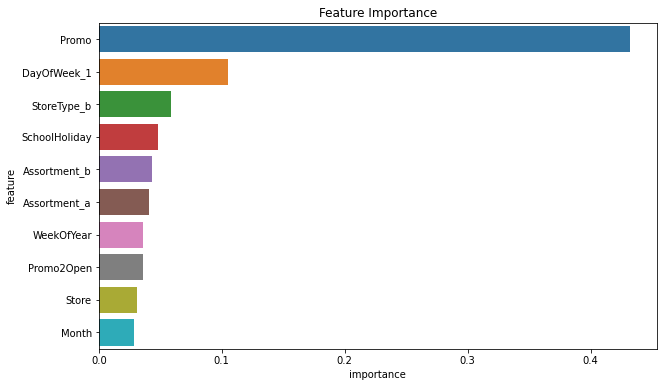

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature')

###K Fold Cross Validation (useful for small datasets)
- split data into many parts (folds) and then each time we train 5 diff models and for each model we use diff fold as the validation set

Ex: train a model on split 1, here we use first 20% a val set 

We look at the val score for each of the splits

we use that for hyperparameter tuning, experementing between different modeling strategies

In [ ]:
from sklearn.model_selection import KFold

define a helper function 'train_and_evaluate' which trains a model the given parameters & returns trained model, training error & validation error

In [ ]:
def train_and_evaluate(X_train, train_targets, X_val, val_targets, **params):
  model = XGBRegressor(random_state=42, n_jobs=-1, **params)
  model.fit(X_train, train_targets)
  train_rmse = rmse(model.predict(X_train), train_targets)
  val_rmse = rmse(model.predict(X_val), val_targets)
  return model, train_rmse, val_rmse

Now, use KFold utility to create different training/validations splits & train a separate model for each fold

In [ ]:
kfold = KFold(n_splits=5, shuffle=True)
# splitting data in 5 ways, use different 20% portion each time for validation, train separate model for each of those splits

In [ ]:
models = []

# indexes of rows for the training set & val set for each split
for train_idxs, val_idxs in kfold.split(X):
  X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
  X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
  model, train_rmse, val_rmse = train_and_evaluate(X_train, 
                                                   train_targets, 
                                                   X_val, 
                                                   val_targets, 
                                                   max_depth=4, 
                                                   n_estimators=20)
  models.append(model)

  print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

[14:08:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 2740.879348984283, Validation RMSE: 2731.433599520696
[14:08:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 2736.5775301243693, Validation RMSE: 2739.241996643361
[14:09:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 2746.539613778322, Validation RMSE: 2747.371257128689
[14:09:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 2750.270808639996, Validation RMSE: 2752.0047503047867
[14:09:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 2739.3145907873404, Validation RMSE: 2749.897538497652


function to average predictions from 5 different models

In [ ]:
def predict_avg(models, inputs):
  return np.mean([model.predict(inputs) for model in models], axis=0)

In [ ]:
preds = predict_avg(models, X)
preds

array([7124.1885, 6889.6826, 7232.639 , ..., 7725.1514, 6261.806 ,
       7725.1514], dtype=float32)

In [ ]:
(models[0].predict(X) + models[1].predict(X)) / 2

array([7053.833 , 6798.0674, 7187.612 , ..., 7490.0376, 6047.9453,
       7490.0376], dtype=float32)

###Hyperparameter Tuning & Regularization
- there are several parameters we can adjust to change the capacity of the model & reduce overfitting

Ex: when the model is weak (train 1 decision tree), u have a high error but as u start increasing the capacity of your model, training error starts & continues to decrease (more parameters to learn about training data), but at some point the test error starts to decrease and this is where u should manage the diff hyperparameters and adjust them to get the best fit, i.e. u get to the minimal possible test error and then it starts to increase.

Since it takes lots of time to perform 5-fold cross val for each set of parameters, let's pick random 10% sample of dataset as validation set:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, train_targets, val_targets = train_test_split(X, targets, test_size=0.1)

In [ ]:
def test_params(**params):
  model = XGBRegressor(random_state=42, n_jobs=-1, **params)
  model.fit(X_train, train_targets)
  train_rmse = rmse(model.predict(X_train), train_targets)
  val_rmse = rmse(model.predict(X_val), val_targets)
  print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

In [ ]:
# n_estimators 
# number of trees to be created, the more trees -> the greater the capacity of model
test_params(n_estimators=10)

[14:10:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 3692.318339626441, Validation RMSE: 3686.5170924685463


As u increase max_depth of each tree, the capacity of tree increases & it can capture more info about the training set, the loss goes down

In [ ]:
test_params(max_depth=2)

[14:10:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 2549.1463368437944, Validation RMSE: 2541.3879396142815


In [ ]:
test_params(max_depth=10)

[10:19:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 1170.10510597956, Validation RMSE: 1220.4291352368018


learning_rate - scaling factor to be applied to the prediction of each tree. 

High alpha (-> 1) will lead to overfitting, low (-> 0) will lead to underfitting.

In [ ]:
test_params(n_estimators=50, learning_rate=0.01)

[14:11:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 5104.593326817126, Validation RMSE: 5099.916084573116


In [ ]:
test_params(n_estimators=50, learning_rate=0.9)

[14:11:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 1937.0227277343124, Validation RMSE: 1930.1910500590873


Instead of decision trees, XGBoost can also train a linear model for each iteration by using booster.

In [ ]:
test_params(booster='gblinear')
#clearly a linear model is not well suited for this data

[14:12:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 2989.8277477054967, Validation RMSE: 2984.762024488513


gamma - what is the minimum reduction in loss that is required to create a split

subsample - fraction of rows

colsample_bytree - fraction of columns that decision tree uses 

###Putting Together & Making Predictions

In [ ]:
model = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=1000, learning_rate=0.2, 
                     max_depth=10, subsample=0.9, colsample_bytree=0.7)

In [ ]:
%%time
model.fit(X, targets)

[14:24:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 1h 11min 46s, sys: 4.05 s, total: 1h 11min 50s
Wall time: 36min 34s


XGBRegressor(colsample_bytree=0.7, learning_rate=0.2, max_depth=10,
             n_estimators=1000, n_jobs=-1, random_state=42, subsample=0.9)

###Function 'predict_input' which can make predictions for single input provided as a dictionary

In [ ]:
sample_input = {
    'Store': 2,
    'DayOfWeek': 4,
    'Promo': 1,
    'Date': '2015-09-30',
    'Open': 1,
    'StateHoliday': 'a',
    'SchoolHoliday': 0
}

In [ ]:
input_df = pd.DataFrame([sample_input])
input_df

Store  DayOfWeek  Promo        Date  Open StateHoliday  SchoolHoliday
0      2          4      1  2015-09-30     1            a              0

In [ ]:
# merge with store
input_merged_df = input_df.merge(store, on='Store')
input_merged_df

Store  DayOfWeek  Promo  ... Promo2SinceWeek  Promo2SinceYear    PromoInterval
0      2          4      1  ...            13.0           2010.0  Jan,Apr,Jul,Oct

[1 rows x 16 columns]

In [ ]:
# feature engineering
# Dates
split_date(input_merged_df)
# Competition
comp_months(input_merged_df)
# Promo2
promo_cols(input_merged_df)
input_merged_df

Store  DayOfWeek  Promo  ... Assortment_a  Assortment_b Assortment_c
0  0.000898          4    1.0  ...          1.0           0.0          0.0

[1 rows x 41 columns]

In [ ]:
# Preprocessing
# Imputation (Fill missing values)
# Scaling
input_merged_df[numeric_cols] = scaler.transform(input_merged_df[numeric_cols])
# Encoding (categ data)
input_merged_df[encoded_cols] = encoder.transform(input_merged_df[categorical_cols] )

In [ ]:
# Selecting the right columns (numerical + encoded)
X_input = input_merged_df[numeric_cols + encoded_cols]
# pass it into the model
model.predict(X_input)[0]

6565.791

In [ ]:
sample_input

{'Date': '2015-09-30',
 'DayOfWeek': 4,
 'Open': 1,
 'Promo': 1,
 'SchoolHoliday': 0,
 'StateHoliday': 'a',
 'Store': 2}

first, predict the average as the prediction, then find the errors that our prediction has made, train the decision tree to correct the errors, and then we make new predictions using the initial prediction & the prediction of the decision tree scaled down by the learning rate and that gives us new errors, try to correct those errors with the 2nd decision tree & so on. 

###Random Forests & Regularization


###Unsupervised Learning & Recommendations
- models are trained without any labels
- used to discover patterns in data & reduce high-dimensional data to fewer dimensions

Clustering real-world application: 
- customer segmentation
- product recommendation: identify clusters of people who like a particular product, then u can recommend that product to people who have the same behaviors
- feature engineering
- anomaly/fraud detection:  cluster credit card transaction, there are certain credit cards that make lots of transactions, so they don't fall with the regular cluster, they fall with anomalous cluster & further detect for this kind of fraudulent behavior: what is the activity? 
- taxonomy creation: hierarchical clustering - u take a bunch of different attributes, i.e. what kind of reproduction of particular animal has, what kind of feed, weight they have, where do they live... use that to create clusters & families of related animals -> kingdoms (divisions in biology between animals & plants -> families, species)

In [3]:
iris_df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
iris_df

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

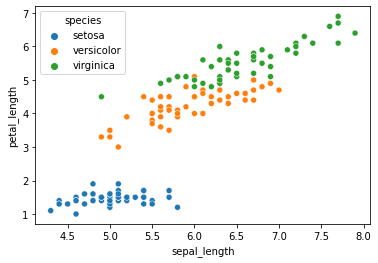

In [ ]:
import seaborn as sns
# regarding 2 dimensions
sns.scatterplot(data=iris_df, x='sepal_length', y='petal_length', hue='species')

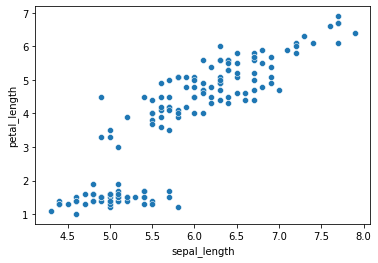

In [ ]:
# without knowing the species
sns.scatterplot(data=iris_df, x='sepal_length', y='petal_length')

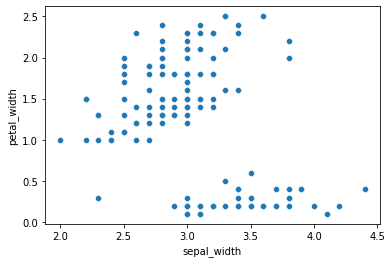

In [ ]:
sns.scatterplot(data=iris_df, x='sepal_width', y='petal_width')

In [4]:
# cluster observations using numeric columns
numeric_cols = ["sepal_length",	"sepal_width",	"petal_length", 	"petal_width"]

In [5]:
X = iris_df[numeric_cols]
X

sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

###K-means
- finding optimal central point (centroids = mean) for each cluster

pick the one where u got the best lowest total variance of the clusters (measure of goodness), i.e. all the points in every cluster are close together 

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=42)

In [ ]:
model.fit(X)

KMeans(n_clusters=3, random_state=42)

In [ ]:
# checking cluster centers for each cluster
model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [ ]:
X

sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

In [ ]:
preds = model.predict(X)
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

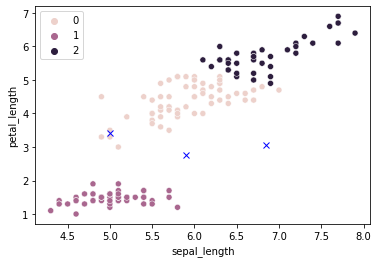

In [ ]:
sns.scatterplot(data = X, x='sepal_length', y='petal_length', hue = preds);
centers_x, centers_y = model.cluster_centers_[:,0], model.cluster_centers_[:,1]
plt.plot(centers_x, centers_y, 'xb')

so, we have classified different species of flowers into separate clusters 

Imagine these are attributes about customers visiting a website & we took 4 attributes about them: how long they stayed on the site, how many things they clicked on, what extent of the page did this scroll to & where did they come from? Then u look at clusters & conclude that some clients are spending little time on the site, these spend decent amount of time & are scrolling to a larger degree & maybe they are making a purchase. Further, u may interview the customers & figure out/understand their demographics, products they look at, the kind of celebrities they follow, maybe get one of these celebrities to endorse our products => get a lot more customers in those clusters. 

In general, u want to grow the cluster of your paying users & ignore the people who are not really interested in your product. This is how it extends into real-world analysis.

In [ ]:
# checking the goodness of the fit
model.inertia_
# total variance of all individual clusters

78.940841426146

In [ ]:
# try creating 6 clusters
model = KMeans(n_clusters=6, random_state=42).fit(X)

In [ ]:
preds = model.predict(X)
preds

array([5, 1, 1, 1, 5, 5, 1, 5, 1, 1, 5, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5,
       1, 5, 1, 1, 5, 5, 5, 1, 1, 5, 5, 5, 1, 1, 5, 1, 1, 5, 5, 1, 1, 5,
       5, 1, 5, 1, 5, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 4, 3, 0, 4, 4, 0, 2, 0, 4, 0,
       4, 4, 4, 3, 4, 4, 4, 0, 0, 3, 4, 3, 0, 3, 4, 0, 3, 3, 4, 0, 0, 0,
       4, 3, 3, 0, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3], dtype=int32)

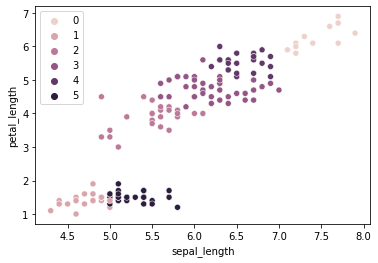

In [ ]:
sns.scatterplot(data = X, x='sepal_length', y='petal_length', hue = preds);

In [ ]:
model.inertia_

38.930963049671746

Try: plot "No. of clusters" vs "Inertia" to pick the right number of clusters

Text(0.5, 0, 'Inertia')

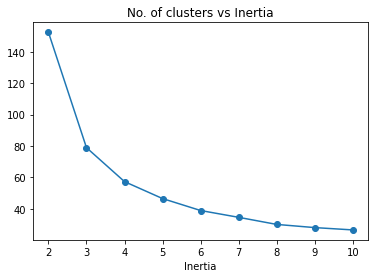

In [ ]:
options = range(2, 11)
inertias = []

for n_clusters in options:
  model = KMeans(n_clusters, random_state=42).fit(X)
  inertias.append(model.inertia_)

plt.title("No. of clusters vs Inertia")
plt.plot(options, inertias, '-o')
plt.xlabel('No. of clusters (K)')
plt.xlabel('Inertia')
# elbow plot, after 6 inertia it goes flat

In Mini-Batcg K-means u pick just a fixed number of points (mini batch size), compute their centroids & compute the cluster centers for those 100 points, then u pick next 100 & use previous case centroids rather than using random key points. So, u update the centroids or upgraade the clusters from previous batch. 

In [ ]:
?KMeans

###Density-based spatial clustering of applications with noise (DBSCAN)
- uses density of points in a region to form clusters
- has 2 params: 'epsilon' & 'min samples' using which it classifies each point as a core point, reachable point or noise point (outlier)

Basically, u take a point and draw around it a circle with radius epsilon, then check if in that circle u have at least 4 points (given 'min samples' = 4), then it is a core point, everything else inside the circle is the part of the cluster. If the circle does not contain the min sample value, then it is an reachable (edge) point. 

In [25]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=1.1, min_samples=4)

In [26]:
model.fit(X)

DBSCAN(eps=1.1, min_samples=4)

In [29]:
model.core_sample_indices_

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149])

In [27]:
# there's no prediction step, it directly assigns labels to all the existing observations/inputs (cluster is defined by connections between points)
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

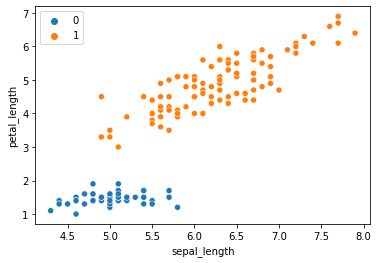

In [28]:
sns.scatterplot(data = X, x='sepal_length', y='petal_length', hue =model.labels_)

####Difference:

In k-means u can specify how many clusters u want, in DBSCAN it will figure out on its own.

Using k-means u can classify new points into clusters, but u cannot use DBSCAN to classify new points (u would have to run the entire scan again, because it's possible that by introduction of a new point, 2 clusters may join together or change in some fashion)

###Hierarchical clustering 
- creates a tree of clusters

combine 2 closest points into a cluster & by combining closest points u create a tree of clusters

Taxonomy: so u have observations about many different types of animals & u start perform the clustering, u may realize that there are close relationships between humans & chimpanzees and then between them & Bonbons there is another relationship & at the end u have aa single cluster of both plants, animals & humans. Center - mean of all the points in the cluster.

###Dimensionality Reduction (to manageable number)

Consider a flight which has hundreds of sensors at different places of the flight & if u collect the info from all of those sensors = end up with thousands of columns -> inefficient thing to analyze & train ML models on:
more columns -> more data -> more processing -> requires more resources & time => slows us down what we're trying to do

###PCA
- uses linear projections of data to reduce their dimensions while maximizing the variance of data in projection. 

if all of the projections are close to 0 == most of info is lost (as all the distance values are close to zero), projections fall in the same place

At first, we find a line along which we can project all the points, line which maintains the highest variance of the points, then PC2 is alligned which is perpendicular to the first line. 

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [31]:
pca.fit(iris_df[numeric_cols])
pca

PCA(n_components=2)

So, we have picked 2 possible linear combinations of 4 features which are independent meaning that lines along which we projected are perpendicular and they are projections on lines that we're left with. 

In [32]:
pca.components_
# 4 numbers convey the direction of first line
# unit vectors

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

In [35]:
# projecting points on lines
transformed = pca.transform(iris_df[numeric_cols])
transformed

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,

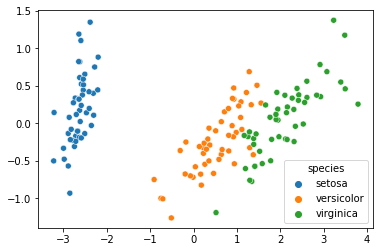

In [34]:
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=iris_df['species'])

Limitations:
- linear projections may not always achieve good separation of data 

###t-Distributed Stochastic Neighbor Embedding (t-SNE): non-linear dimensionality reduction (manifold learning)
- visualizes high dimensional data in 1, 2, 3 dimensions 

every point of a cluster that is projected down on the line is moved closer to the points that are closer to it in the original dataset. So, the closeness in the actual data is reflected as closeness in the reduced dimension. 

In [1]:
from sklearn.manifold import TSNE

# setting number of dimensions
tsne = TSNE(n_components=2)

In [7]:
transformed = tsne.fit_transform(iris_df[numeric_cols])
transformed

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



array([[-23.58937   ,  10.24084   ],
       [-26.044453  ,   9.796268  ],
       [-26.285786  ,  10.905211  ],
       [-26.536972  ,  10.691534  ],
       [-23.478292  ,  10.2229    ],
       [-21.505993  ,  10.882234  ],
       [-26.06987   ,  11.536686  ],
       [-24.305185  ,  10.607894  ],
       [-27.295792  ,  10.480397  ],
       [-25.61681   ,  10.15957   ],
       [-22.149223  ,  10.174641  ],
       [-25.010359  ,  11.137003  ],
       [-26.357275  ,  10.026802  ],
       [-27.561342  ,  10.996276  ],
       [-21.06733   ,   9.580781  ],
       [-20.667885  ,  10.070331  ],
       [-21.635082  ,   9.878427  ],
       [-23.552511  ,  10.51564   ],
       [-21.138268  ,  10.781835  ],
       [-22.352942  ,  10.616048  ],
       [-22.786674  ,  11.403576  ],
       [-22.74071   ,  10.749336  ],
       [-26.383284  ,  12.225676  ],
       [-23.902369  ,  11.643548  ],
       [-24.897274  ,  11.750689  ],
       [-25.663345  ,   9.626821  ],
       [-24.061766  ,  11.22896   ],
 

Imagine u haave 784 dimension (28*28 pixels) -> perform PCA -> reduce to 50 dimensions -> using TSNE u reduce it to 2 dimensions, i.e. by conducting t-SNE u can see which points are closer together in the original data.

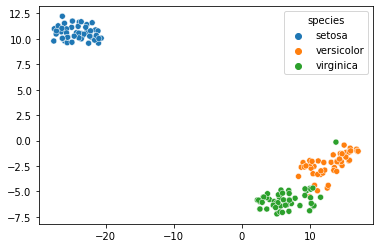

In [9]:
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=iris_df['species'])

U may see that flowers from the same species are clustered very closely together 

###Recommendation systems
- content-based (movies with the same actors, director, genre...)
- collaborative filtering (making predictions about the interests of a user by collecting preferences from many users), u look at the connections between users & items (Amazon - products, Netflix - movies, Facebook - friend suggestion), not content